# Read CSV

In [1]:
## How has the COVID pandemic impacted the amount of work done remotely? What can be expected post-pandemic?
#--> Thinking about your current job, how much of your time did you...


## Does working remotely positively impact productivity? Are there any other benefits?

## How does an employees use of time differ when working remotely vs on-site?

## What are the biggest barriers to overcome if remote work becomes the norm in the future?

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
#Read Data
wfh20_df = pd.read_csv("/Users/thamjayshen/Downloads/Data Analyst Case Studies/Remote Working Survey/2020_rws.csv", encoding='cp1252')
wfh21_df = pd.read_csv("/Users/thamjayshen/Downloads/Data Analyst Case Studies/Remote Working Survey/2021_rws.csv",encoding='cp1252')

In [4]:
wfh20_df.shape

(1507, 73)

In [5]:
#Obtain the shape of the dataframe
print(wfh20_df.shape)


(1507, 73)


In [6]:
#Check null values of the dataset
wfh20_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 73 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                              --------------  -----  
 0   Response ID                                           

# How does an employees use of time differ when working remotely vs on-site?


## 2020 Data

In [7]:
#statistical description of count, std, mean
wfh20_df.describe() 

Response ID  What year were you born?  \
count  1507.000000               1507.000000   
mean    754.000000               1974.791639   
std     435.177741                 11.875588   
min       1.000000               1900.000000   
25%     377.500000               1965.000000   
50%     754.000000               1975.000000   
75%    1130.500000               1985.000000   
max    1507.000000               2001.000000   

       On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Preparing for work and commuting  \
count                                        1507.000000                                                                                                       
mean                                            1.795786                                                                                                       
std                                             1.379599                                                                                                       
min                                             0.000000                                                                                                       
25%                                             1.000000                                                                                                       
50%                                             1.500000                                                                                                       
75%                                             2.000000                                                                                                       
max                                            20.000000                                                                                                       

       On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Working  \
count                                        1507.000000                                                                              
mean                                            7.531128                                                                              
std                                             2.626245                                                                              
min                                             0.000000                                                                              
25%                                             7.000000                                                                              
50%                                             8.000000                                                                              
75%                                             8.000000                                                                              
max                                            60.000000                                                                              

       On a day when you attend your employer's workplace, how many hours would you spend doing the following activities? - Personal and family time  \
count                                        1507.000000                                                                                               
mean                                            3.969642                                                                                               
std                                             3.114015                                                                                               
min                                             0.000000                                                                                               
25%                                             2.000000                                                                                               
50%  

In [8]:
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh20_df.loc[:,wfh20_df.columns.str.contains("On a day when you")].columns.str.split("-"):
    if i[-1].lstrip().replace(" ", "_") not in unique_name_list:
        unique_name_list.append(i[-1].lstrip().replace(" ", "_"))
    if "employer's" in i[0]:
        rename_list.append(i[-1].lstrip().replace(" ", "_") + "[WFO]")
        
    else:
        rename_list.append(i[-1].lstrip().replace(" ", "_") + "[WFH]")
        

hours20_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("On a day when you")]
hours20_df.columns = rename_list #Rename columns



In [9]:
hours20_df.describe()

Preparing_for_work_and_commuting[WFO]  Working[WFO]  \
count                            1507.000000   1507.000000   
mean                                1.795786      7.531128   
std                                 1.379599      2.626245   
min                                 0.000000      0.000000   
25%                                 1.000000      7.000000   
50%                                 1.500000      8.000000   
75%                                 2.000000      8.000000   
max                                20.000000     60.000000   

       Personal_and_family_time[WFO]  \
count                    1507.000000   
mean                        3.969642   
std                         3.114015   
min                         0.000000   
25%                         2.000000   
50%                         3.000000   
75%                         5.000000   
max                        20.000000   

       Caring_and_domestic_responsibilities[WFO]  \
count                                1507.000000   
mean                                    2.296981   
std                                     2.056728   
min                                    -1.000000   
25%                                     1.000000   
50%                                     2.000000   
75%                                     3.000000   
max                                    20.000000   

       Preparing_for_work_and_commuting[WFH]  Working[WFH]  \
count                            1507.000000   1507.000000   
mean                                0.668653      7.832887   
std                                 1.345080      2.560533   
min                                 0.000000      0.000000   
25%                                 0.000000      7.000000   
50%                                 0.300000      8.000000   
75%                                 1.000000      9.000000   
max                                20.000000     40.000000   

       Personal_and_family_time[WFH]  \
count                    1507.000000   
mean                        4.660186   
std                         3.182748   
min                         0.000000   
25%                         2.500000   
50%                         4.000000   
75%                         6.000000   
max                        20.000000   

       Caring_and_domestic_responsibilities[WFH]  
count                                1507.000000  
mean                                    2.628832  
std                                     2.131725  
min                                     0.000000  
25%                                     1.000000  
50%                                     2.000000  
75%                                     4.000000  
max                                    20.000000

In [10]:
unique_name_list

['Preparing_for_work_and_commuting',
 'Working',
 'Personal_and_family_time',
 'Caring_and_domestic_responsibilities']

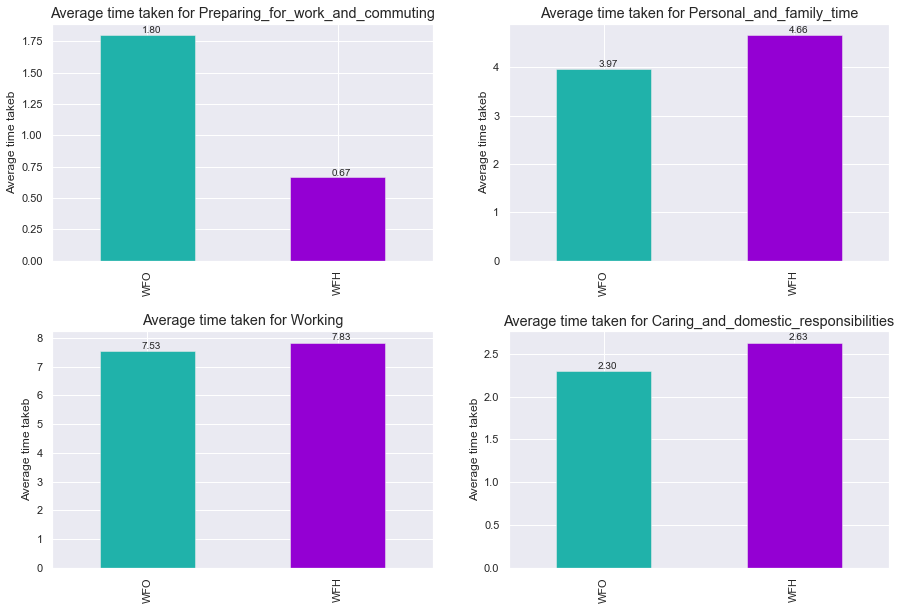

In [11]:
f, axes = plt.subplots(2, 2, figsize=(20, 50))

row = 0
col=0


for x in unique_name_list: #["Preparing_for_work_and_commuting","Working","Personal_and_family_time","Caring_and_domestic_responsibilities"]
    if row%2==0 and row !=0:
        row = 0
        col +=1
    df = hours20_df.loc[:,[ x+"[WFO]", x+"[WFH]"]]
    df = df.rename(columns = {x+"[WFO]":"WFO", x+"[WFH]": "WFH"})
    #Average time preparing and comutting to work 
    plt.style.use('ggplot')
    colors = ["#20B2AA", "#9400D3"]
    df.mean().plot.bar(legend=False, figsize=(15,10), color=colors, ax=axes[row,col], title = 'Average time taken for '+x, ylabel = "Average time takeb"  )
    for p in axes[row,col].patches:
        axes[row,col].annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.22, p.get_height()*1.01))

    row +=1

plt.subplots_adjust(hspace=0.3) # wspace = 0.2

## 2021 Data

In [12]:
wfh21_df.describe()

Response ID  What year were you born?    \
count  1512.000000                 1512.000000   
mean    756.500000                 1979.226190   
std     436.621117                   11.836707   
min       1.000000                 1957.000000   
25%     378.750000                 1970.000000   
50%     756.500000                 1980.000000   
75%    1134.250000                 1989.000000   
max    1512.000000                 2002.000000   

       Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities?   For example, a response of ‘1’ means 1 hour.  A response of ‘0.5’ means half an hour.   Your responses should add to 24 hours.   - Preparing for work and commuting  \
count                                        1509.000000                                                                                                                                                                                                                                                                                 
mean                                            2.245772                                                                                                                                                                                                                                                                                 
std                                             1.643633                                                                                                                                                                                                                                                                                 
min                                             0.000000                                                                                                                                                                                                                                                                                 
25%                                             1.000000                                                                                                                                                                                                                                                                                 
50%                                             2.000000                                                                                                                                                                                                                                                                                 
75%                                             3.000000                                                                                                                                                                                                                                                                                 
max                                            20.000000                                                                                                                                                                                                                                                                                 

       Think about your experience this year. On a day when you attend your employer's workplace, how many hours would you spend doing the following activities?   For example, a response of ‘1’ means 1 hour.  A response of ‘0.5’ means half an hour.   Your responses should add to 24 hours.   - Working  \
count                                        1509.000000                                                                                                                                                                                                                                

In [13]:
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh21_df.loc[:,wfh21_df.columns.str.contains("On a day when you")].columns.str.split("-"):
    if i[-1].lstrip().replace(" ", "_") not in unique_name_list:
        unique_name_list.append(i[-1].lstrip().replace(" ", "_"))
    if "employer's" in i[0]:
        rename_list.append(i[-1].lstrip().replace(" ", "_") + "[WFO]")
        
    else:
        rename_list.append(i[-1].lstrip().replace(" ", "_") + "[WFH]")
        

hours21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("On a day when you")]
hours21_df.columns = rename_list #Rename columns


In [14]:
hours21_df.describe()

Preparing_for_work_and_commuting[WFO]  Working[WFO]  \
count                            1509.000000   1509.000000   
mean                                2.245772      7.831875   
std                                 1.643633      1.931000   
min                                 0.000000      0.000000   
25%                                 1.000000      7.000000   
50%                                 2.000000      8.000000   
75%                                 3.000000      8.500000   
max                                20.000000     20.000000   

       Caring_and_domestic_responsibilities[WFO]  \
count                                1495.000000   
mean                                    2.797124   
std                                     1.626177   
min                                     0.000000   
25%                                     2.000000   
50%                                     3.000000   
75%                                     4.000000   
max                                    19.000000   

       Personal_and_family_time[WFO]   Sleep[WFO]  \
count                    1507.000000  1500.000000   
mean                        3.854672     7.393367   
std                         1.765716     1.547390   
min                         0.000000     0.000000   
25%                         3.000000     7.000000   
50%                         4.000000     8.000000   
75%                         5.000000     8.000000   
max                        14.000000    20.000000   

       Preparing_for_work_and_commuting[WFH]  Working[WFH]  \
count                            1488.000000   1509.000000   
mean                                1.178192      8.110471   
std                                 1.949860      2.098393   
min                                 0.000000      0.000000   
25%                                 0.000000      7.000000   
50%                                 0.500000      8.000000   
75%                                 1.000000      9.000000   
max                                24.000000     24.000000   

       Caring_and_domestic_responsibilities[WFH]  \
count                                1494.000000   
mean                                    3.026171   
std                                     1.573106   
min                                     0.000000   
25%                                     2.000000   
50%                                     3.000000   
75%                                     4.000000   
max                                    17.000000   

       Personal_and_family_time[WFH]   Sleep[WFH]  
count                    1505.000000  1503.000000  
mean                        4.335402     7.484930  
std                         1.908772     1.567494  
min                         0.000000     0.000000  
25%                         3.000000     7.000000  
50%                         4.000000     8.000000  
75%                         5.000000     8.000000  
max                        24.000000    14.000000

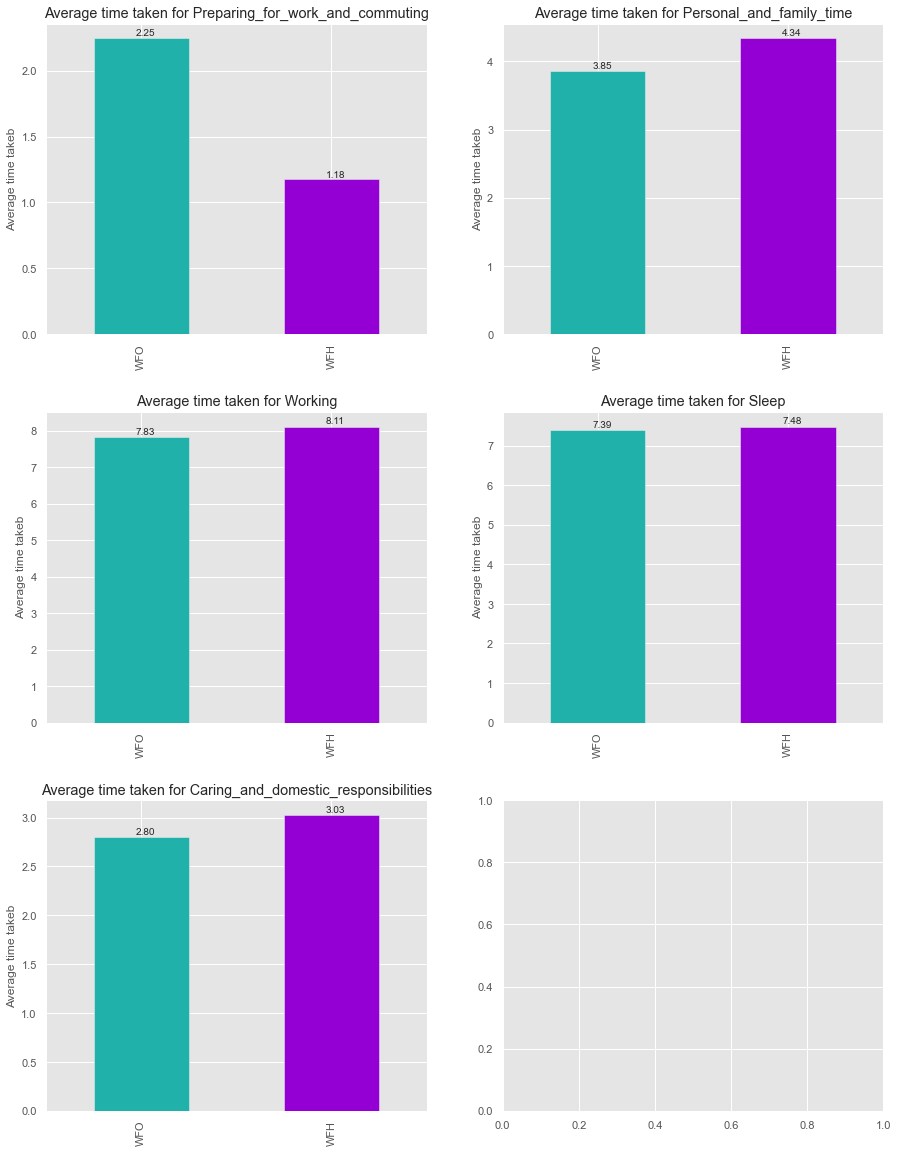

In [15]:
f, axes = plt.subplots(3, 2, figsize=(40, 20))

row = 0
col=0


for x in unique_name_list: #["Preparing_for_work_and_commuting","Working","Personal_and_family_time","Caring_and_domestic_responsibilities"]
    if row%3==0 and row !=0:
        row = 0
        col +=1
    df = hours21_df.loc[:,[ x+"[WFO]", x+"[WFH]"]]
    df = df.rename(columns = {x+"[WFO]":"WFO", x+"[WFH]": "WFH"})
    #Average time preparing and comutting to work 
    plt.style.use('ggplot')
    colors = ["#20B2AA", "#9400D3"]
    df.mean().plot.bar(legend=False, figsize=(15,20), color=colors, ax=axes[row,col], title = 'Average time taken for '+x, ylabel = "Average time takeb"  )
    for p in axes[row,col].patches:
        axes[row,col].annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.22, p.get_height()*1.01))

    row +=1

plt.subplots_adjust(hspace=0.25) # wspace = 0.2

# WIll WFH be norm after Covid?

## 2020 Data

In [16]:
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh20_df.loc[:,wfh20_df.columns.str.contains("Imagine that COVID-19 is cured or eradicated")].columns.str.split("-"):
    print(i)
    if i[-1].lstrip().replace(" ", "_") not in unique_name_list:
        unique_name_list.append(i[-1].lstrip().replace(" ", "_"))
    if "How likely" in i[1]:
        rename_list.append(i[-1].lstrip().replace(" ", "_"))
        
    else:
        rename_list.append("how much of your time would you prefer to work remotely".replace(" ","_"))
        

norm20_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("Imagine that COVID-19 is cured or eradicated")]
norm20_df.columns = rename_list #Rename columns


['Imagine that COVID', '19 is cured or eradicated. Going forward, how much of your time would you prefer to work remotely?']
['Imagine that COVID', '19 is cured or eradicated.  How likely would you consider the following statements? ', ' My employer would encourage more remote working']
['Imagine that COVID', '19 is cured or eradicated.  How likely would you consider the following statements? ', ' My employer would make changes to support remote working']
['Imagine that COVID', '19 is cured or eradicated.  How likely would you consider the following statements? ', ' I would have more choice about whether I work remotely']


In [17]:
norm20_df

how_much_of_your_time_would_you_prefer_to_work_remotely  \
0                                                   90%        
1                                                   20%        
2                                                   60%        
3                                 100% - All of my time        
4                                                   60%        
...                                                 ...        
1502                                                NaN        
1503                                                NaN        
1504                                                NaN        
1505                                                NaN        
1506                                                NaN        

     My_employer_would_encourage_more_remote_working  \
0                                  Somewhat disagree   
1                                     Somewhat agree   
2                                     Somewhat agree   
3                                     Somewhat agree   
4                                  Strongly disagree   
...                                              ...   
1502                      Neither agree nor disagree   
1503                                  Somewhat agree   
1504                      Neither agree nor disagree   
1505                                  Somewhat agree   
1506                               Somewhat disagree   

     My_employer_would_make_changes_to_support_remote_working  \
0                                     Somewhat disagree         
1                                        Somewhat agree         
2                                        Somewhat agree         
3                                        Strongly agree         
4                                     Strongly disagree         
...                                                 ...         
1502                                     Strongly agree         
1503                                     Somewhat agree         
1504                                     Somewhat agree         
1505                                     Strongly agree         
1506                                  Somewhat disagree         

     I_would_have_more_choice_about_whether_I_work_remotely  
0                                     Strongly disagree      
1                                        Somewhat agree      
2                                        Somewhat agree      
3                                        Somewhat agree      
4                                     Strongly disagree      
...                                                 ...      
1502                                     Somewhat agree      
1503                                     Strongly agree      
1504                         Neither agree nor disagree      
1505                                     Strongly agree      
1506                                  Somewhat disagree      

[1507 rows x 4 columns]

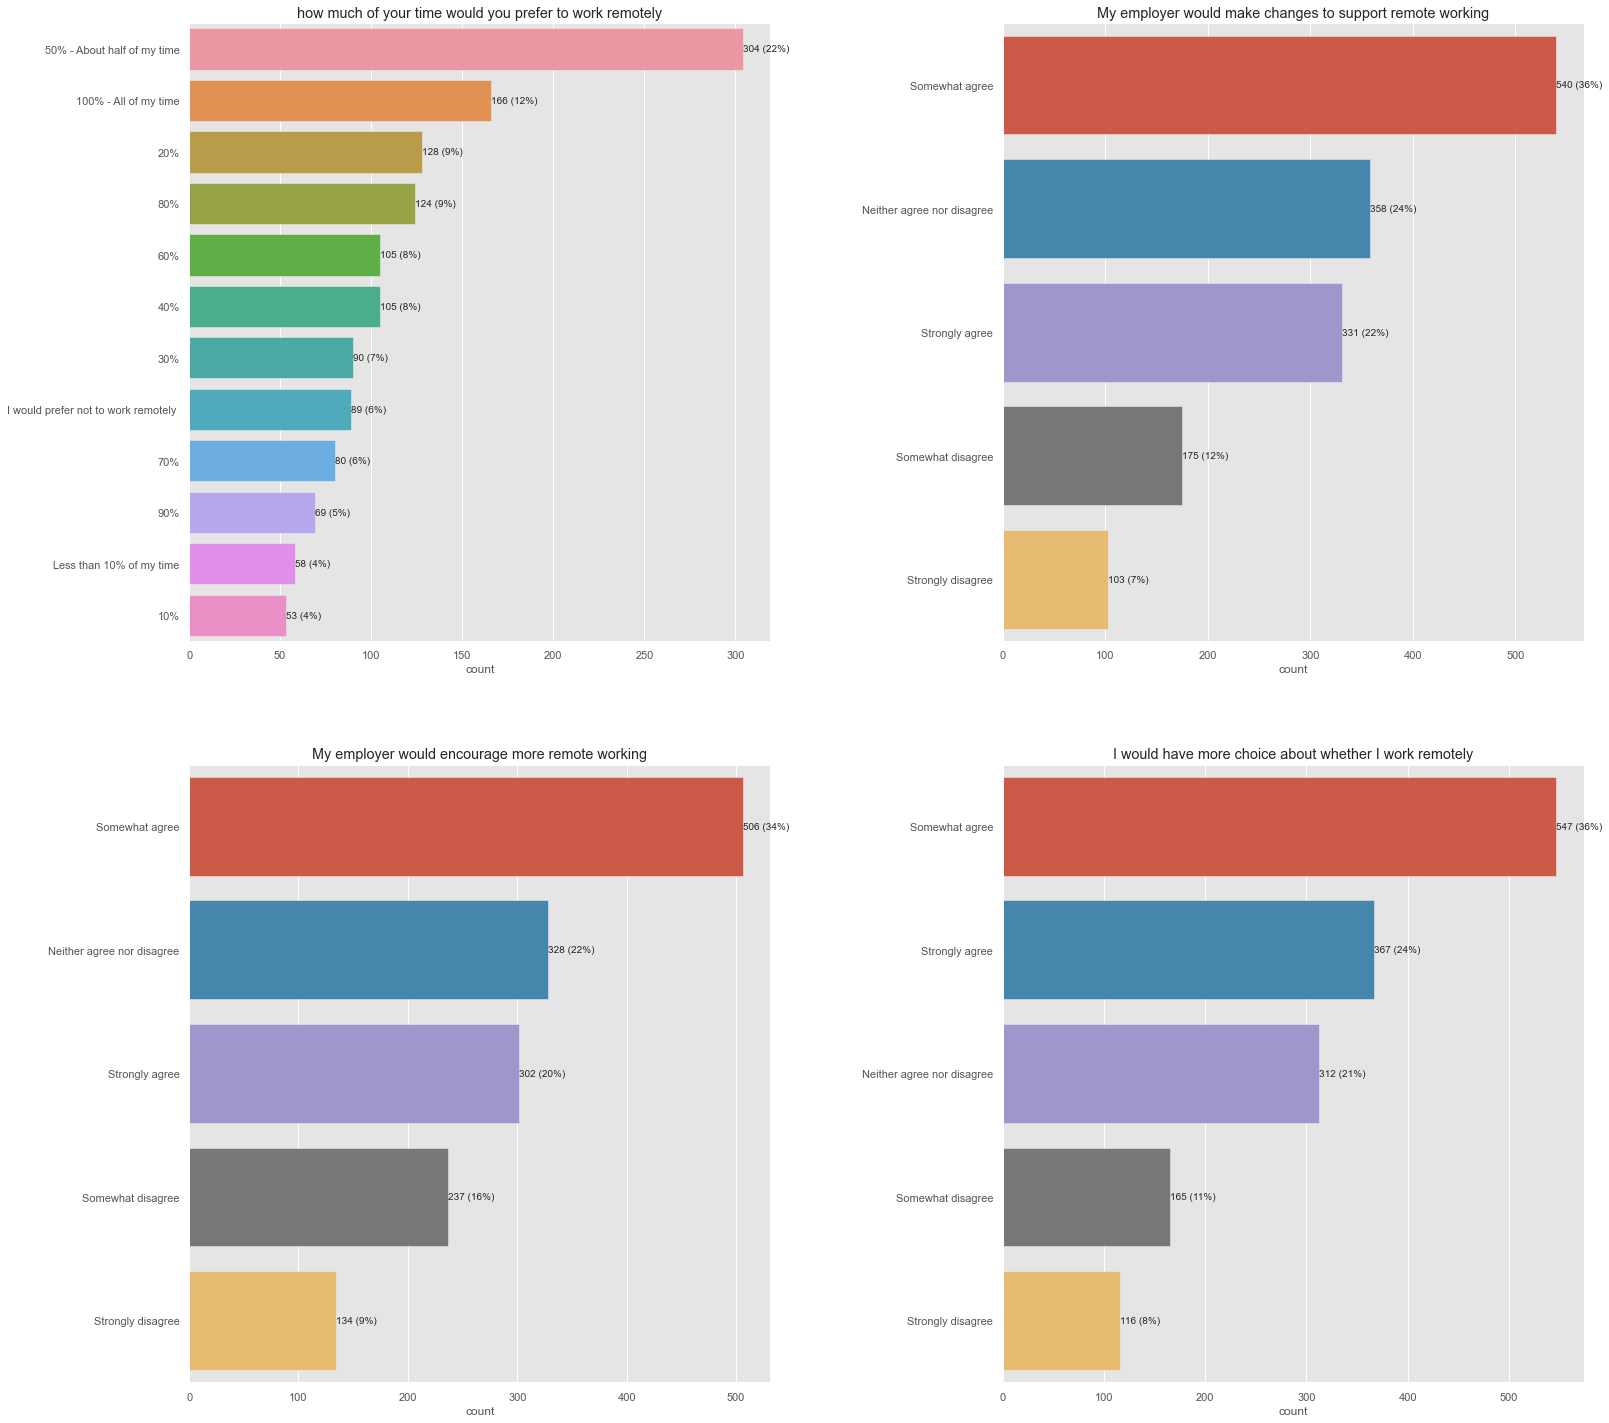

In [18]:
## This cat plot is just to see the counts of orders placed for each category. This is different from the total quantity sold from each category
#Get cat plot with labels

f, axes = plt.subplots(2, 2, figsize=(25, 25))

row = 0
col=0

for i in norm20_df.columns:
    if row%2==0 and row !=0:
        row = 0
        col +=1

    p1 = sb.countplot(y=norm20_df[i], order=norm20_df[i].value_counts(ascending=False).index, ax = axes[row,col])
    p1.set(ylabel=None)
    #Defining labels
    abs_values = norm20_df[i].value_counts(ascending=False).values
    rel_values = norm20_df[i].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    #Plot labels
    axes[row,col].bar_label(container=axes[row,col].containers[0], labels=lbls)
    axes[row,col].set_title(i.replace("_"," "))
    
    row+=1

plt.subplots_adjust(wspace=0.4) # wspace = 0.2

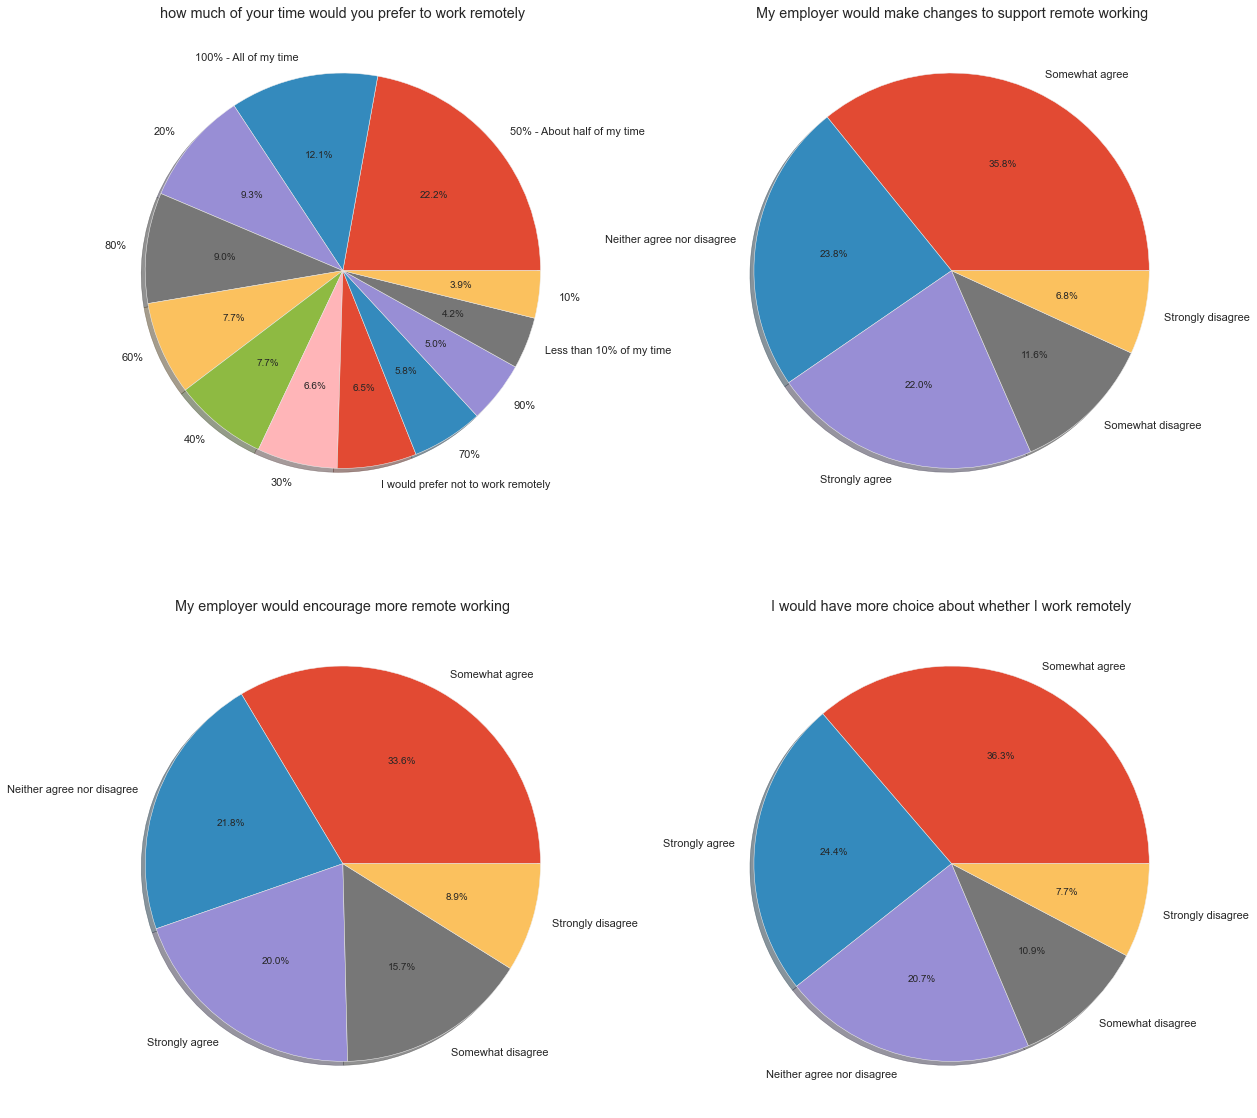

In [19]:
#Pie chart for each field
f, axes = plt.subplots(2,2,figsize = (20,20))

row = 0
col=0

for i in norm20_df:
    if row%2==0 and row !=0:
        row = 0
        col +=1

    norm20_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[row,col])
    row+=1


array([<AxesSubplot:ylabel=' '>], dtype=object)

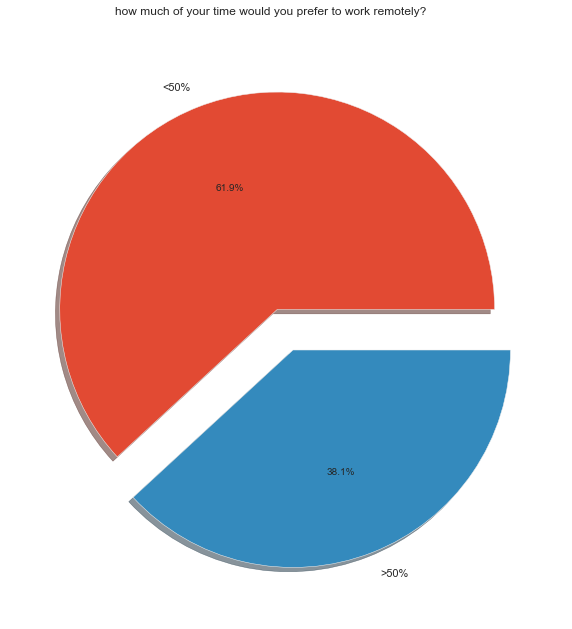

In [20]:
#Proportion of respondents that prefer to WFH
hi = norm20_df["how_much_of_your_time_would_you_prefer_to_work_remotely"].value_counts()
new_list = [0,0]
key_list = ['100% - All of my time', "90%", "80%", "70%", "60%","50% - About half of my time"]

for key,value in pd.DataFrame(hi).iterrows():
  if key in key_list: #the variable you want. Change the name in ‘ ’
    new_list[0] += value[0]
    
  else:
    new_list[1] += value[0]

df = pd.DataFrame({"how_much_of_your_time_would_you_prefer_to_work_remotely":new_list}, index = ["<50%",">50%"])
df.plot.pie(y = "how_much_of_your_time_would_you_prefer_to_work_remotely", subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0], shadow = True,legend=False, ylabel = " ", title = "how_much_of_your_time_would_you_prefer_to_work_remotely?".replace("_"," ") )




Above analysis shows how employees feel on remote working

From the pie charts, it can be seen that the general consus of the employees sentiment is that employers will encourage remote working post covid, having more flexibility to work remotely, and employers will make changes to support WFH.

If given WFH options, majority of the employees would rather much spend 50% or more of their time WFH instead of the office.

Below analysis is whether organization allows people to work remotely

In [21]:
#Renaming columns that we want
rename_list = []
   
for i in wfh20_df.loc[:,wfh20_df.columns.str.contains("Thinking about remote working last year, how strongly do you agree or disagree with the following statements?")].columns.str.split("-"):
    rename_list.append(i[-1].lstrip().replace(" ", "_"))

rename_list
          
remote_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("Thinking about remote working last year, how strongly do you agree or disagree with the following statements?")]
remote_df.columns = rename_list #Rename columns


In [22]:
remote_df

My_organisation_encouraged_people_to_work_remotely  \
0                                                   NaN   
1                                        Somewhat agree   
2                                        Somewhat agree   
3                                     Strongly disagree   
4                                     Strongly disagree   
...                                                 ...   
1502                         Neither agree nor disagree   
1503                                     Somewhat agree   
1504                         Neither agree nor disagree   
1505                                     Strongly agree   
1506                                  Strongly disagree   

     My_organisation_was_well_prepared_for_me_to_work_remotely  \
0                                                   NaN          
1                                        Somewhat agree          
2                                        Somewhat agree          
3                                        Somewhat agree          
4                                        Somewhat agree          
...                                                 ...          
1502                                     Somewhat agree          
1503                         Neither agree nor disagree          
1504                         Neither agree nor disagree          
1505                                     Strongly agree          
1506                                  Somewhat disagree          

     It_was_common_for_people_in_my_organisation_to_work_remotely  \
0                                                   NaN             
1                                        Somewhat agree             
2                            Neither agree nor disagree             
3                                     Somewhat disagree             
4                                     Somewhat disagree             
...                                                 ...             
1502                                     Somewhat agree             
1503                         Neither agree nor disagree             
1504                                  Somewhat disagree             
1505                         Neither agree nor disagree             
1506                                  Strongly disagree             

     It_was_easy_to_get_permission_to_work_remotely  \
0                                               NaN   
1                                    Somewhat agree   
2                                    Somewhat agree   
3                                 Somewhat disagree   
4                                 Strongly disagree   
...                                             ...   
1502                                 Strongly agree   
1503                     Neither agree nor disagree   
1504                                 Somewhat agree   
1505                                 Strongly agree   
1506                              Strongly disagree   

     I_could_easily_collaborate_with_colleagues_when_working_remotely  \
0                                                   NaN                 
1                                        Somewhat agree                 
2                            Neither agree nor disagree                 
3                                        Somewhat agree                 
4                                        Strongly agree                 
...                                                 ...                 
1502                                     Strongly agree                 
1503                         Neither agree nor disagree                 
1504                                     Somewhat agree                 
1505                                     Somewhat agree                 
1506                                     Somewhat agree                 

     I_would_recommend_remote_working_to_others  
0                                           NaN  
1                                Som

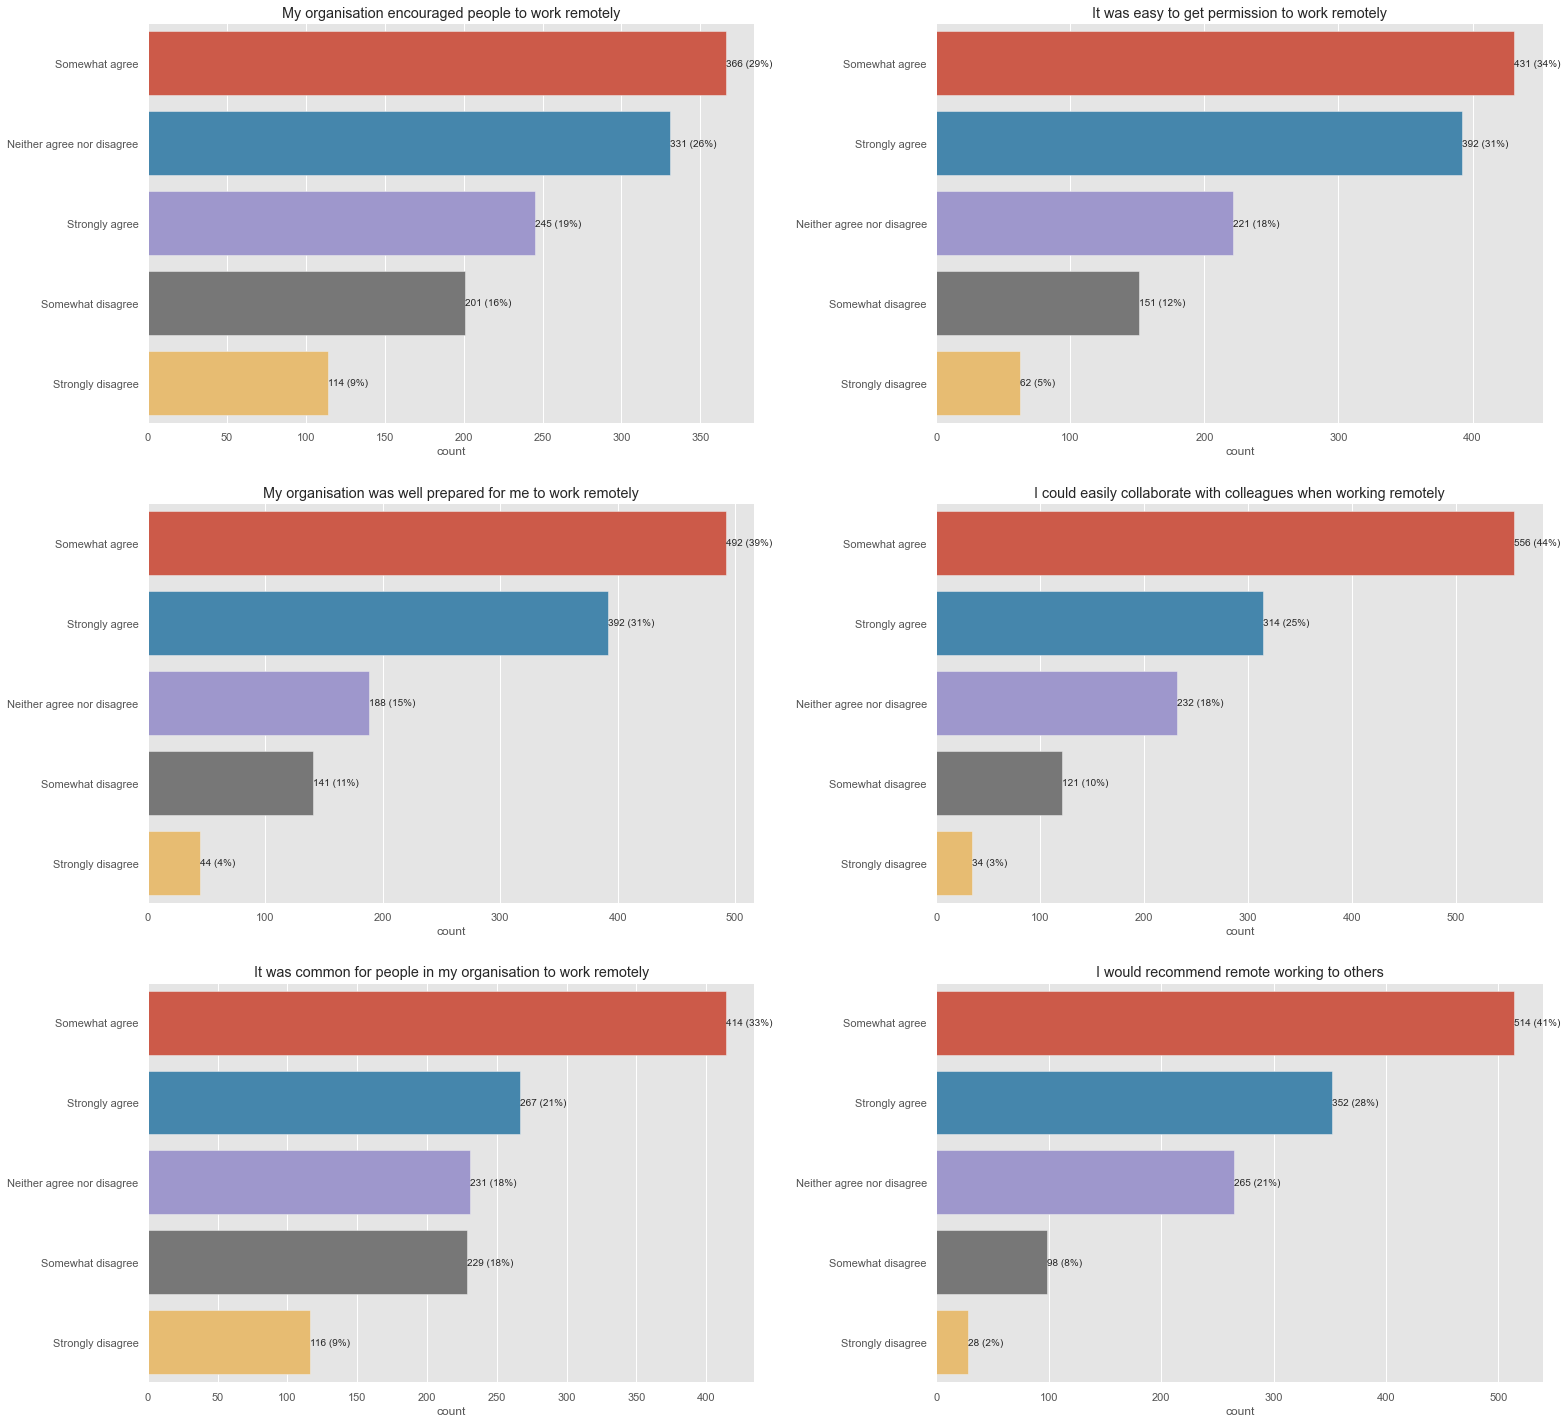

In [23]:
## This cat plot is just to see the counts of orders placed for each category. This is different from the total quantity sold from each category
#Get cat plot with labels

f, axes = plt.subplots(3, 2, figsize=(25, 25))

row = 0
col=0

for i in remote_df.columns:
    if row%3==0 and row !=0:
        row = 0
        col +=1

    p1 = sb.countplot(y=remote_df[i], order=remote_df[i].value_counts(ascending=False).index, ax = axes[row,col])
    p1.set(ylabel=None)
    #Defining labels
    abs_values = remote_df[i].value_counts(ascending=False).values
    rel_values = remote_df[i].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    #Plot labels
    axes[row,col].bar_label(container=axes[row,col].containers[0], labels=lbls)
    axes[row,col].set_title(i.replace("_"," "))
    
    row+=1

plt.subplots_adjust(wspace=0.3) # wspace = 0.2

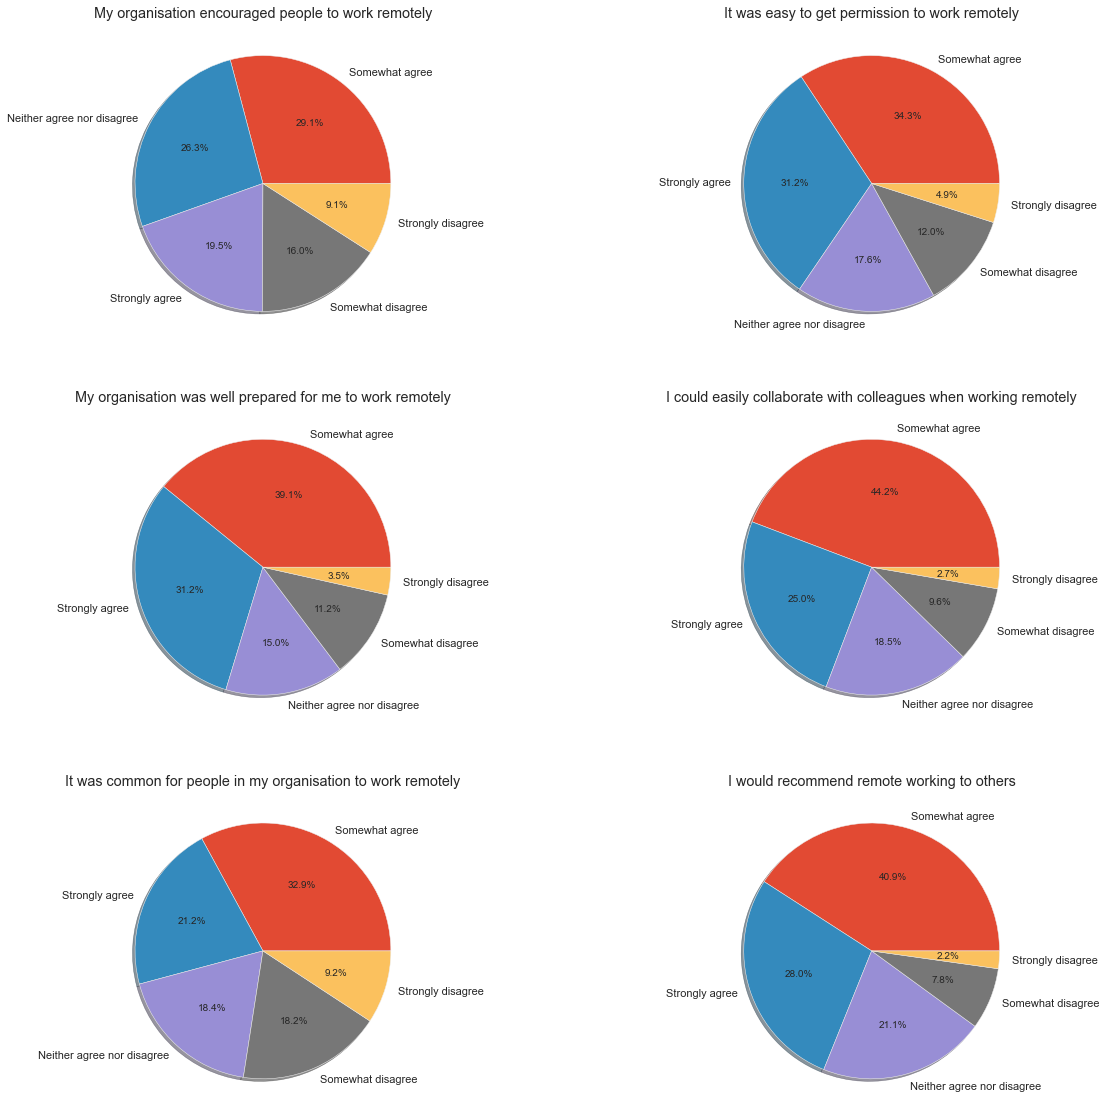

In [24]:
#Pie chart for each field
f, axes = plt.subplots(3,2,figsize = (20,20))

row = 0
col=0

for i in remote_df:
    if row%3==0 and row !=0:
        row = 0
        col +=1

    remote_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[row,col])
    row+=1

Organization reccomend employees to work remotely, employees well equipped to work remotely, could collaborate easily at home, common for poeple to wfh. Employees strongly reccomend others to WFH.

Overall, it can be observed that employees are highly inclined to WFH and organization are supporting them by encouraging them to do so and providing them with the necessary equipment to do so. 

In [25]:
#--> Thinking about your current job, how much of your time did you...
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh20_df.loc[:,wfh20_df.columns.str.contains("Thinking about your current job, how much of your time did you")].columns.str.split(","):
    print(i)

    rename_list.append(i[-1].lstrip().replace(" ", "_"))


propwfh_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("Thinking about your current job, how much of your time did you")]
propwfh_df.columns = rename_list #Rename columns

['Thinking about your current job', ' how much of your time did you spend remote working last year?']
['Thinking about your current job', ' how much of your time did you spend remote working in the last 3 months?']


In [26]:
propwfh_df["how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months?"].value_counts()

100% - I spent all of my time remote working          543
90%                                                   146
50% - I spent about half of my time remote working    137
80%                                                   109
20%                                                   108
Less than 10% of my time                               84
40%                                                    77
30%                                                    76
70%                                                    70
60%                                                    67
10%                                                    59
Rarely or never                                        31
Name: how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months?, dtype: int64

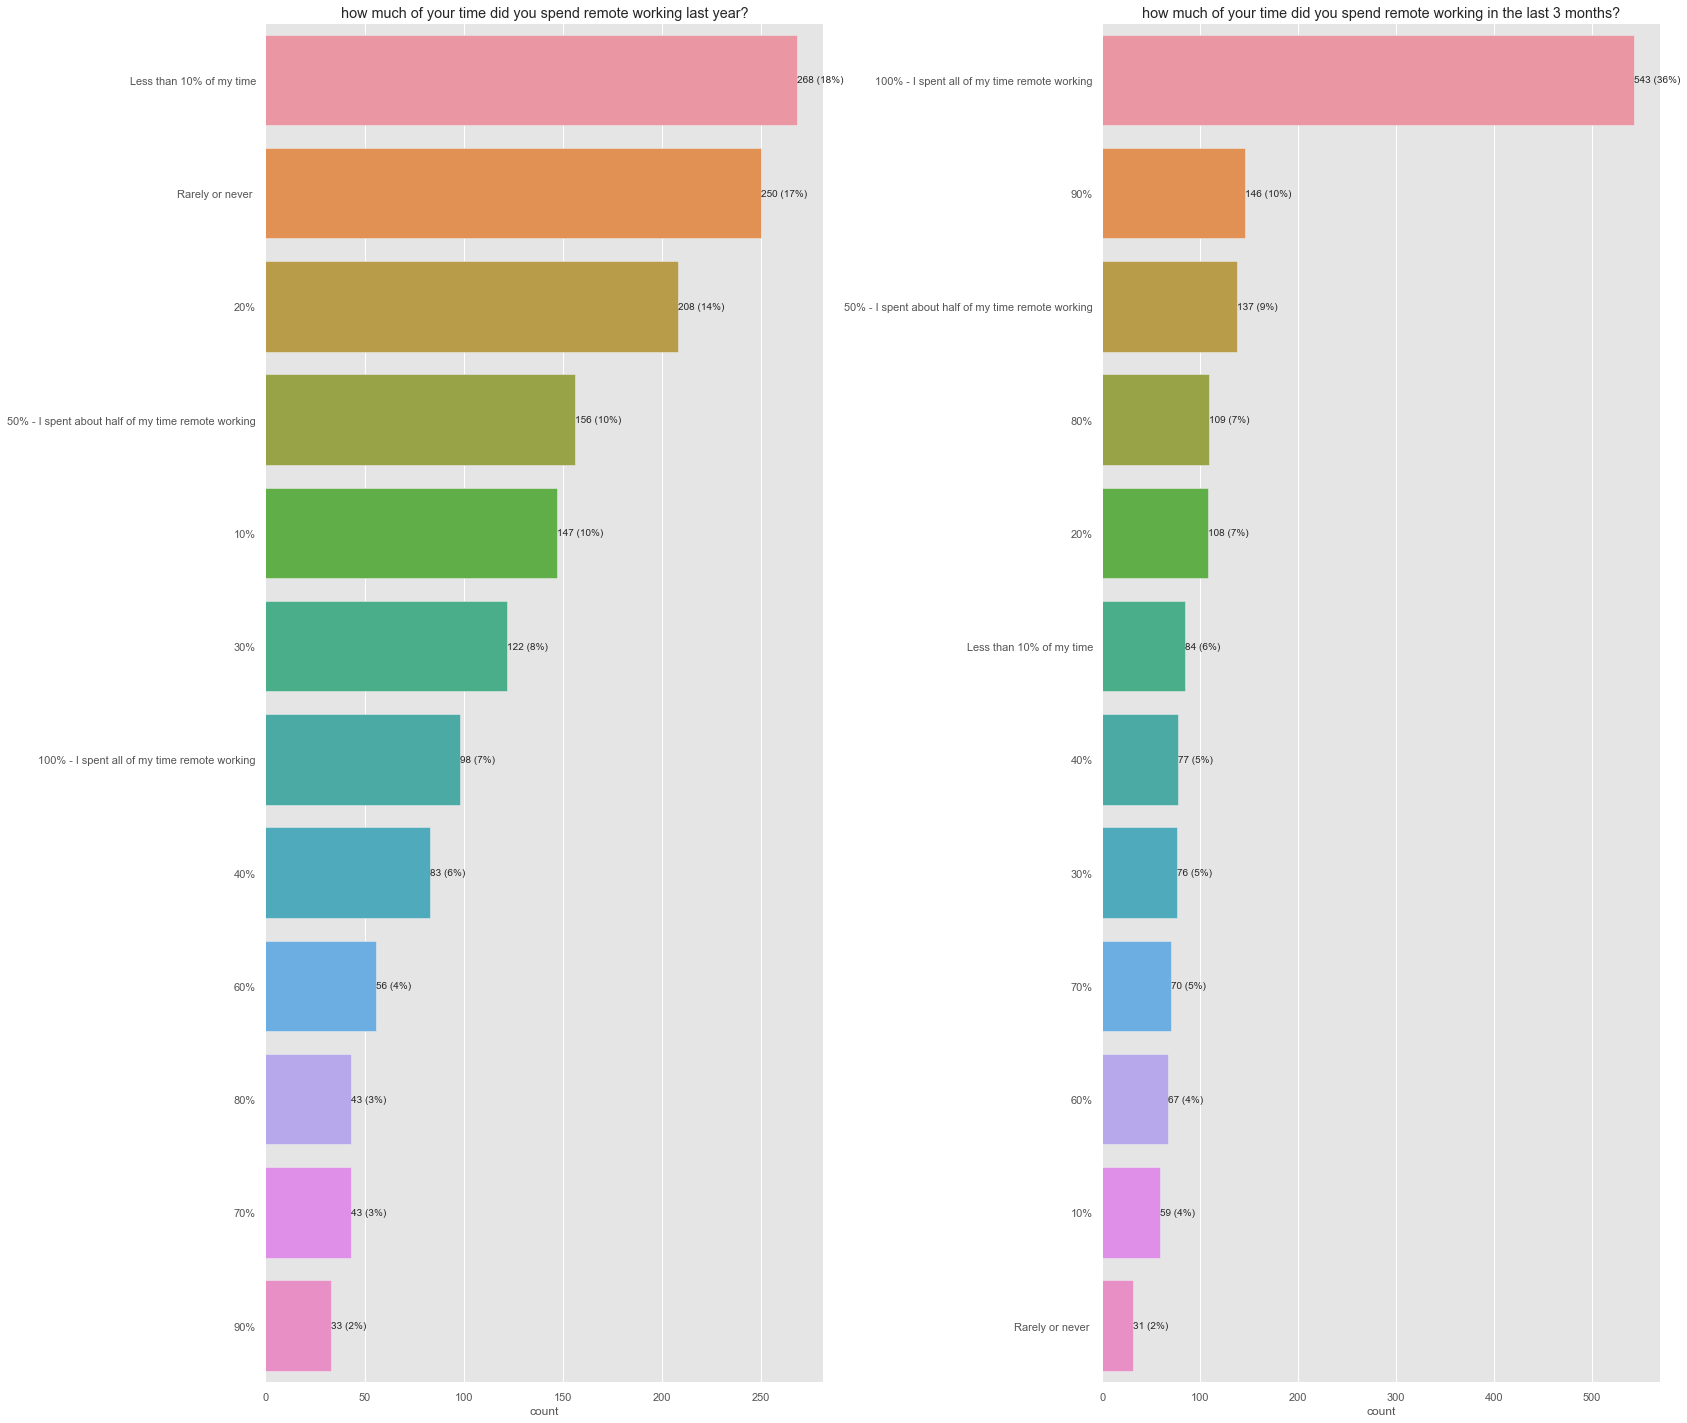

In [27]:
## This cat plot is just to see the counts of orders placed for each category. This is different from the total quantity sold from each category
#Get cat plot with labels

f, axes = plt.subplots(1, 2, figsize=(25, 25))

col=0

for i in propwfh_df.columns:

    p1 = sb.countplot(y=propwfh_df[i], order=propwfh_df[i].value_counts(ascending=False).index, ax = axes[col])
    p1.set(ylabel=None)
    #Defining labels
    abs_values = propwfh_df[i].value_counts(ascending=False).values
    rel_values = propwfh_df[i].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    #Plot labels
    axes[col].bar_label(container=axes[col].containers[0], labels=lbls)
    axes[col].set_title(i.replace("_"," "))
    
    col+=1
plt.subplots_adjust(wspace=0.5) # wspace = 0.2

In [28]:
propwfh_df

how_much_of_your_time_did_you_spend_remote_working_last_year?  \
0                                      Rarely or never               
1                                                   20%              
2                                                   60%              
3                                                   20%              
4                              Less than 10% of my time              
...                                                 ...              
1502                                                10%              
1503                                                10%              
1504  50% - I spent about half of my time remote wor...              
1505                                                20%              
1506                                                10%              

     how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months?  
0                                                   90%                        
1                                                   20%                        
2     50% - I spent about half of my time remote wor...                        
3          100% - I spent all of my time remote working                        
4                                                   90%                        
...                                                 ...                        
1502       100% - I spent all of my time remote working                        
1503                                                70%                        
1504                                                30%                        
1505       100% - I spent all of my time remote working                        
1506       100% - I spent all of my time remote working                        

[1507 rows x 2 columns]

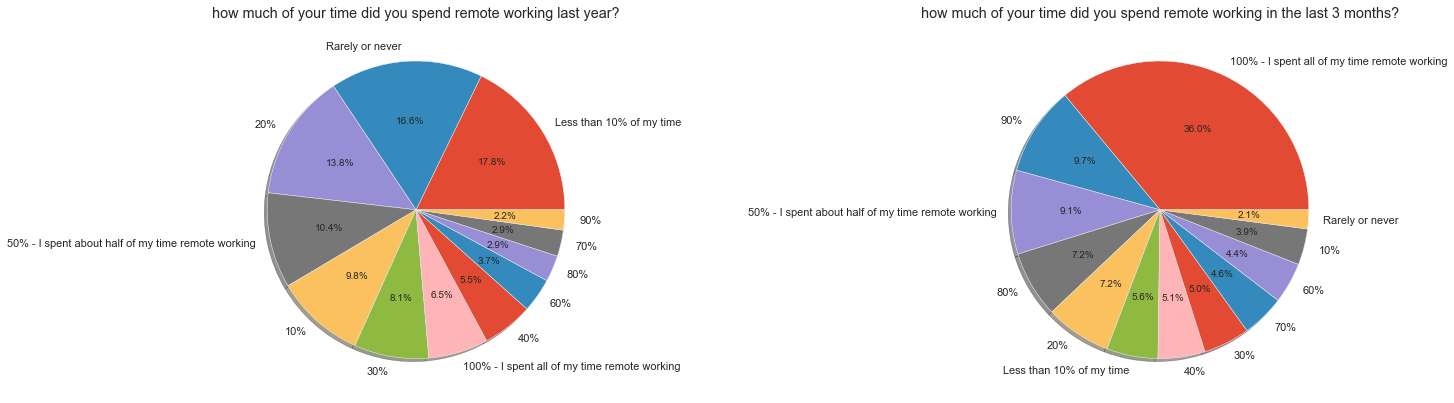

In [29]:
#Pie chart for each field
f, axes = plt.subplots(1,2,figsize = (20,20))

col=0

for i in propwfh_df:
    propwfh_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[col])
    col +=1

plt.subplots_adjust(wspace = 1)

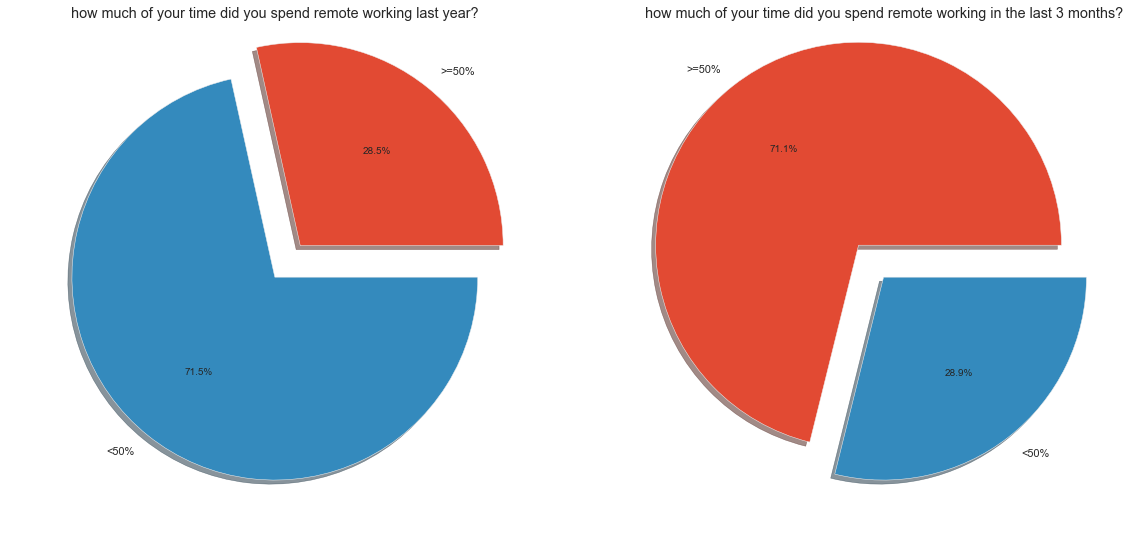

In [30]:
#Proportion of respondents that prefer to WFH

f,axes = plt.subplots(1,2,figsize = (20,10))

col = 0

for i in propwfh_df:
  hi = propwfh_df[i].value_counts()
  new_list = [0,0]
  key_list = ['100% - I spent all of my time remote working', "90%", "80%", "70%", "60%","50% - I spent about half of my time remote working"]

  for key,value in pd.DataFrame(hi).iterrows():
    if key in key_list: #the variable you want. Change the name in ‘ ’
      new_list[0] += value[0]
      
    else:
      new_list[1] += value[0]
  df = pd.DataFrame({i:new_list}, index = [">=50%","<50%"])
  df.plot.pie(y = i, subplots=True,autopct='%1.1f%%',explode=[0.2,0], shadow = True,legend=False, ax = axes[col], ylabel = " ")
  axes[col].set_title(i.replace("_"," "))
  col+=1



More people shifted to WFH in the last 3 months with covid. Prior to covid, people were still mostly working in office

## 2021 Data

In [31]:
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh21_df.loc[:,wfh21_df.columns.str.contains("Imagine that COVID-19 is cured or eradicated")].columns.str.split("-"):
    print(i)
    if i[-1].lstrip().replace(" ", "_") not in unique_name_list:
        unique_name_list.append(i[-1].lstrip().replace(" ", "_"))
    if "How likely" in i[1]:
        rename_list.append(i[-1].lstrip().replace(" ", "_"))
        
    else:
        rename_list.append("how much of your time would you prefer to work remotely".replace(" ","_"))
        

norm21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("Imagine that COVID-19 is cured or eradicated")]
norm21_df.columns = rename_list #Rename columns

['Imagine that COVID', '19 is cured or eradicated.   Going forward, how much of your work time would you prefer to work remotely?  If you work a 5 day week, each day of remote working equals 20% of your time.  ']
['Imagine that COVID', '19 is cured or eradicated.    How likely would you consider the following statements?   ', ' My employer would encourage more remote working']
['Imagine that COVID', '19 is cured or eradicated.    How likely would you consider the following statements?   ', ' My employer would make changes to support remote working']
['Imagine that COVID', '19 is cured or eradicated.    How likely would you consider the following statements?   ', ' I would have more choice about whether I work remotely']


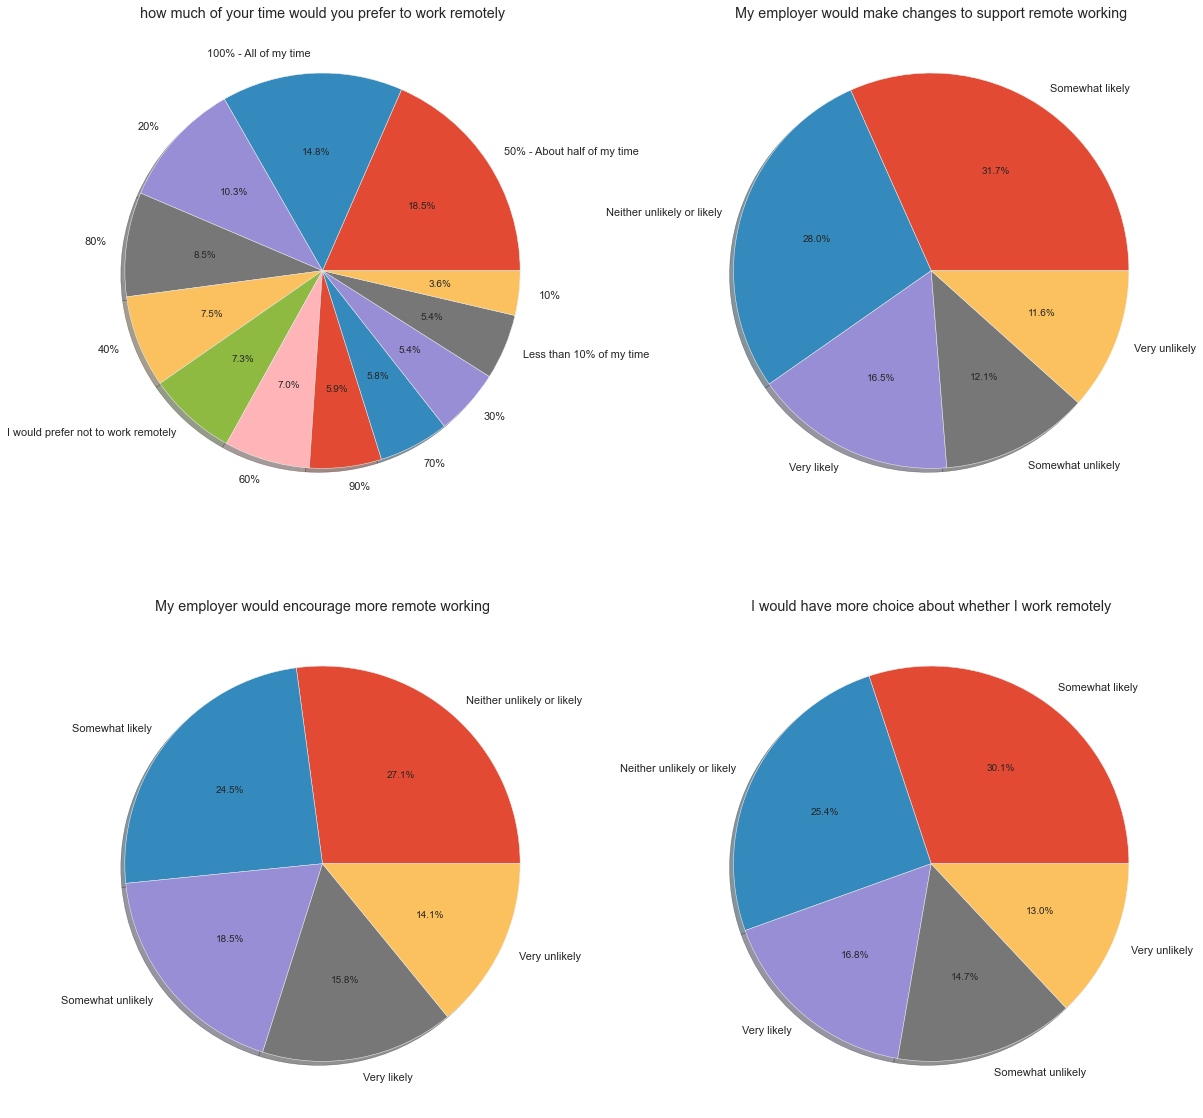

In [32]:
#Pie chart for each field
f, axes = plt.subplots(2,2,figsize = (20,20))

row = 0
col=0

for i in norm21_df:
    if row%2==0 and row !=0:
        row = 0
        col +=1

    norm21_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[row,col])
    row+=1

array([<AxesSubplot:ylabel=' '>], dtype=object)

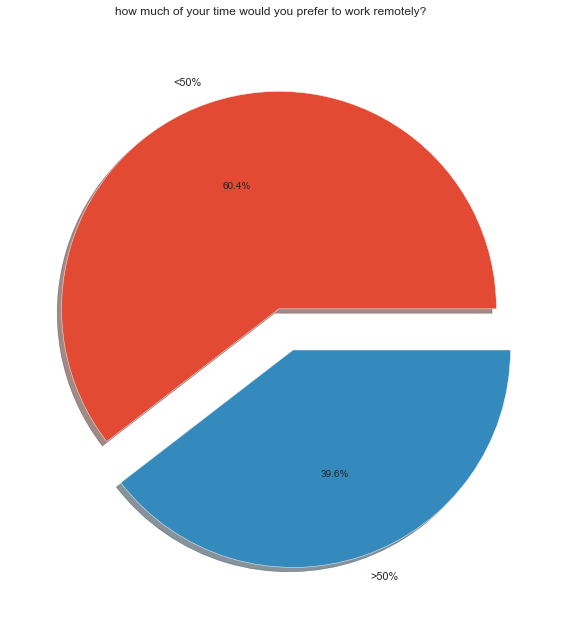

In [33]:
#Proportion of respondents that prefer to WFH
hi = norm21_df["how_much_of_your_time_would_you_prefer_to_work_remotely"].value_counts()
new_list = [0,0]
key_list = ['100% - All of my time', "90%", "80%", "70%", "60%","50% - About half of my time"]

for key,value in pd.DataFrame(hi).iterrows():
  if key in key_list: #the variable you want. Change the name in ‘ ’
    new_list[0] += value[0]
    
  else:
    new_list[1] += value[0]

df = pd.DataFrame({"how_much_of_your_time_would_you_prefer_to_work_remotely":new_list}, index = ["<50%",">50%"])
df.plot.pie(y = "how_much_of_your_time_would_you_prefer_to_work_remotely", subplots=True,figsize=(25, 10),autopct='%1.1f%%',explode=[0.2,0], shadow = True,legend=False, ylabel = " ", title = "how_much_of_your_time_would_you_prefer_to_work_remotely?".replace("_"," ") )



In [34]:
#Renaming columns that we want
rename_list = []
   
for i in wfh21_df.loc[:,wfh21_df.columns.str.contains("Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?")].columns.str.split("-"):
    
    rename_list.append(i[-1].lstrip().replace(" ", "_"))

    print(i)
remote21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?")]
remote21_df.columns = rename_list #Rename columns

['Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   ', ' My organisation encouraged people to work remotely']
['Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   ', ' My organisation was well prepared for me to work remotely']
['Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   ', ' It was common for people in my organisation to work remotely']
['Thinking about remote working in the last 6 months, how strongly do you agree or disagree with the following statements?   Please select a single response per row   ', ' It was easy to get permission to work remotely']
['Thinking about remote working in the last 6 months, how strongly do you agree or disa

In [35]:
len(rename_list)

7

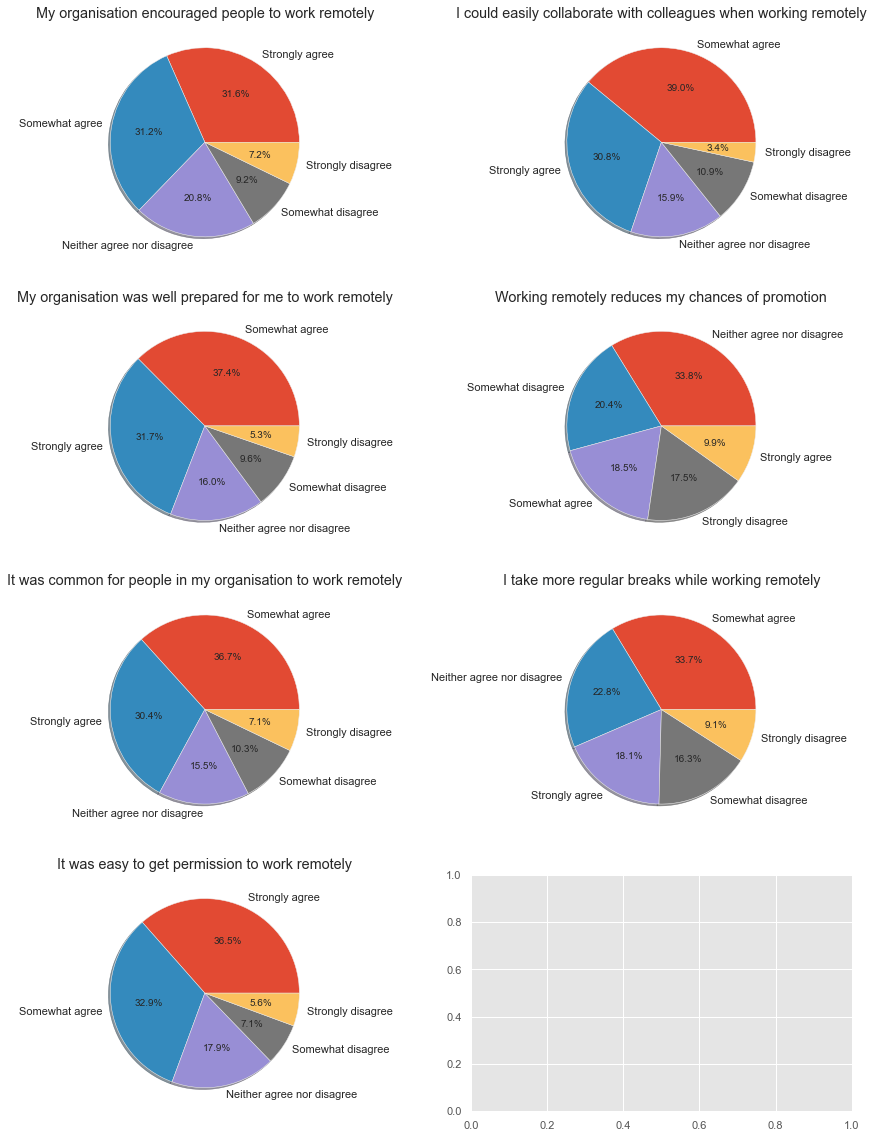

In [36]:
#Pie chart for each field
f, axes = plt.subplots(4,2, figsize =(15,20))

row = 0
col=0

for i in remote21_df:
    if row%4==0 and row !=0:
        row = 0
        col +=1

    remote21_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[row,col])
    row+=1

Comparing this with 2020, the proportion of respondents who said that organization encouraged them to work remotely has increased tremendously. 
Also it was more common for people to work remotely in 2021 comapred to 2020

It is also interesting to see that people take more breaks when they WFH

In [37]:
#--> Thinking about your current job, how much of your time did you...
#Renaming columns that we want
rename_list = []
unique_name_list = []    
for i in wfh21_df.loc[:,wfh21_df.columns.str.contains("Thinking about your current job, how much of your work time")].columns.str.split(","):
    print(i)

    rename_list.append(i[1].lstrip().replace(" ", "_").split("__")[0])


propwfh21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("Thinking about your current job, how much of your work time")]
propwfh21_df.columns = rename_list #Rename columns

['Thinking about your current job', ' how much of your work time did you spend working remotely in the last quarter of last year?   This means October-December 2020  If you work a 5 day week', ' each day of remote working equals 20% of your time.  ']
['Thinking about your current job', ' how much of your work time have you spent working remotely this year?  If you work a 5 day week', ' each day of remote working equals 20% of your time.  ']


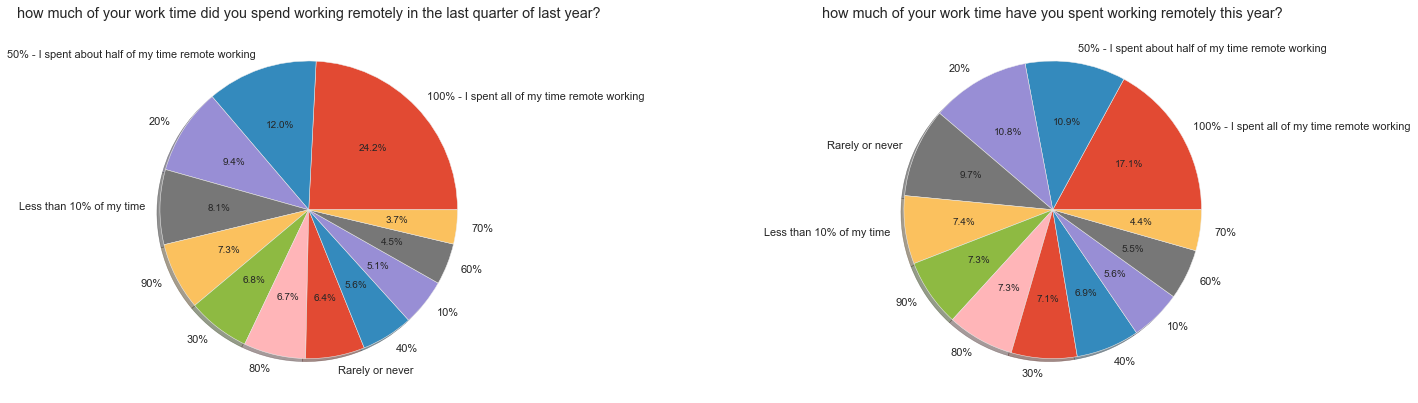

In [38]:
#Pie chart for each field
f, axes = plt.subplots(1,2,figsize = (20,20))

col=0

for i in propwfh21_df:
    propwfh21_df[i].value_counts().plot.pie(autopct='%1.1f%%', shadow = True,legend=False, ylabel = " ", title = i.replace("_"," "), ax = axes[col])
    col +=1

plt.subplots_adjust(wspace = 1)

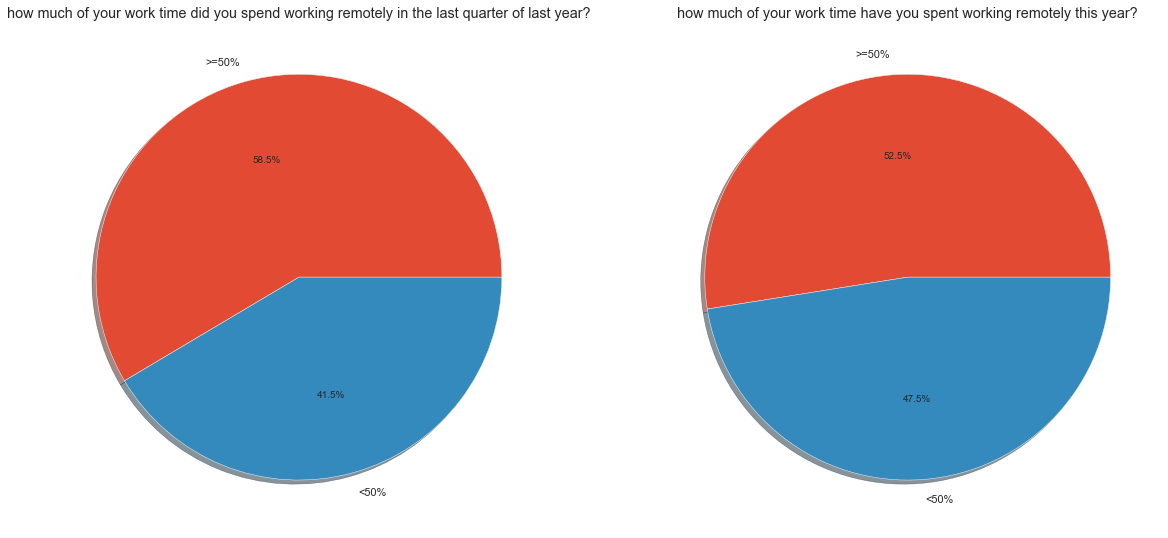

In [39]:
#Proportion of respondents that prefer to WFH

f,axes = plt.subplots(1,2,figsize = (20,10))

col = 0

for i in propwfh21_df:
  hi = propwfh21_df[i].value_counts()
  new_list = [0,0]
  key_list = ['100% - I spent all of my time remote working', "90%", "80%", "70%", "60%","50% - I spent about half of my time remote working"]

  for key,value in pd.DataFrame(hi).iterrows():
    if key in key_list: #the variable you want. Change the name in ‘ ’
      new_list[0] += value[0]
      
    else:
      new_list[1] += value[0]
  df = pd.DataFrame({i:new_list}, index = [">=50%","<50%"])
  df.plot.pie(y = i, subplots=True,autopct='%1.1f%%', shadow = True,legend=False, ax = axes[col], ylabel = " ")
  axes[col].set_title(i.replace("_"," "))
  col+=1


Lesser people are working remotely in the last quarter of last year, compared to the last 3 months in 2020. This might be due to covid measures relaxing and people going back to office.
Nonetheless, the majority are still WFH.

However, it can be seen that in 2021, more people are spending time WFH as compared to in 2020.

# Productivity when WFH

## 2020

In [40]:
prod_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("This question is about your productivity.")]

In [41]:
prod_df.columns = ["Productivity"]

In [42]:
prod_df["Productivity"].value_counts()

My productivity is about same when I work remotely         437
I’m 50% more productive when working remotely (or more)    220
I’m 20% more productive when working remotely              208
I’m 30% more productive when working remotely              193
I’m 10% more productive when working remotely              101
I’m 10% less productive when working remotely               97
I’m 20% less productive when working remotely               90
I’m 40% more productive when working remotely               84
I’m 30% less productive when working remotely               43
I’m 50% less productive when working remotely (or less)     27
I’m 40% less productive when working remotely                7
Name: Productivity, dtype: int64

<AxesSubplot:title={'center':'Productivity'}, ylabel=' '>

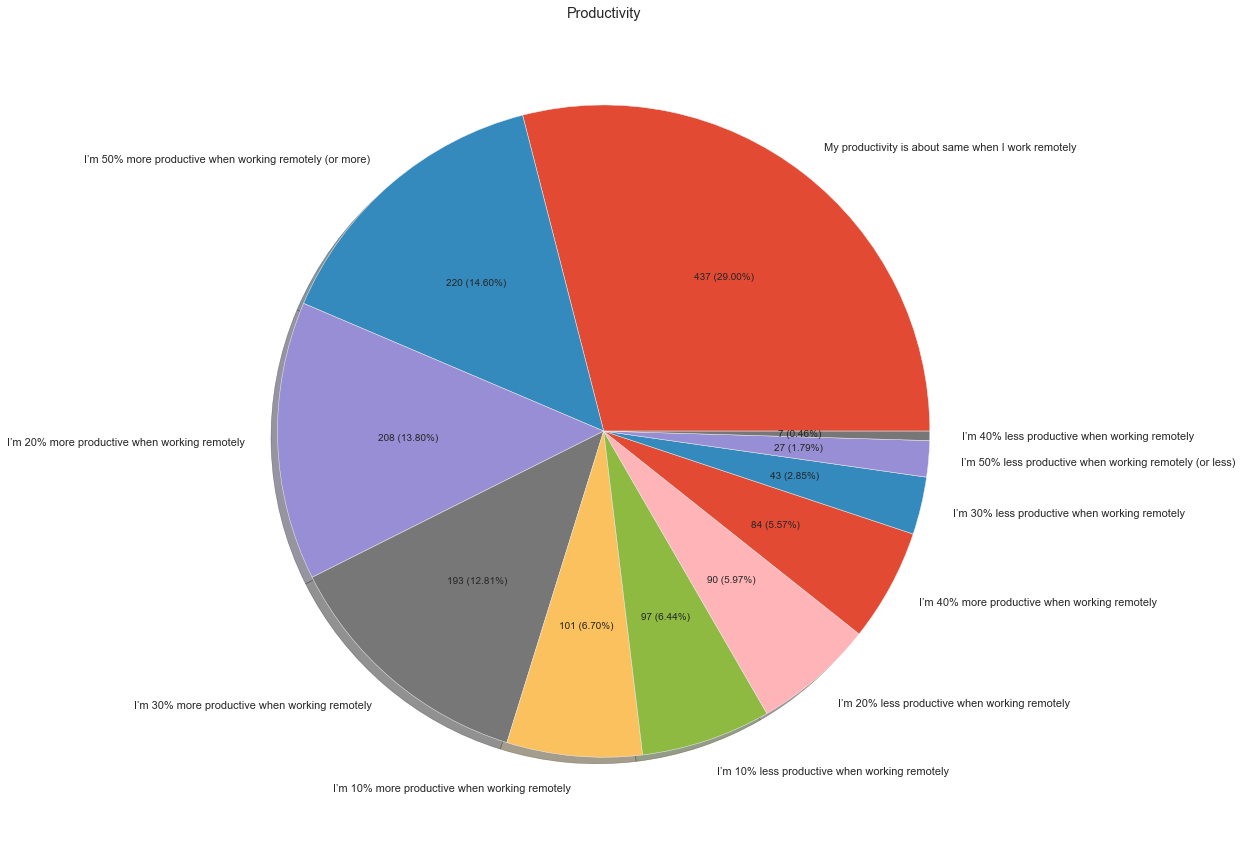

In [43]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return str(val) + ' ({:.2%})'.format(val/total)  #'{v}'.format(v=val)
    return my_format

values = prod_df["Productivity"].value_counts().values

prod_df["Productivity"].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = "Productivity",figsize = (15,15))


array([<AxesSubplot:ylabel='Productivity'>], dtype=object)

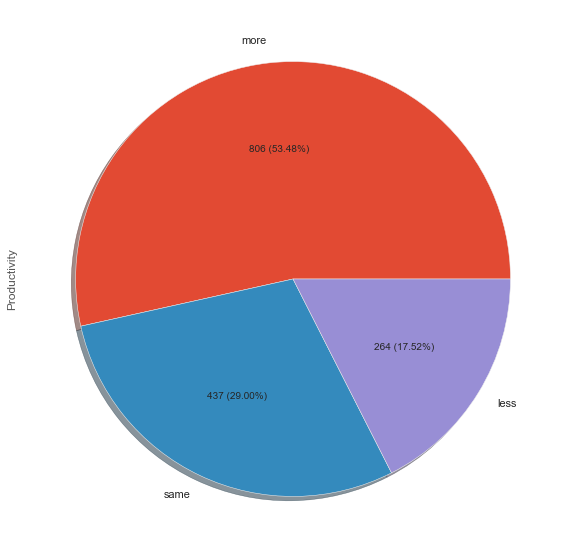

In [44]:
#Summary of responses
hi = prod_df["Productivity"].value_counts()
new_list = [0,0,0]
for key,value in pd.DataFrame(hi).iterrows():
  if "more" in key:
    new_list[0] += value[0]
  elif "same" in key:
    new_list[1] += value[0]
  else:
    new_list[2] += value[0]

df = pd.DataFrame({"Productivity":new_list}, index = ["more","same","less"])
df.plot.pie(y = "Productivity", subplots=True,figsize=(25, 10),autopct= autopct_format(new_list), shadow = True,legend=False)



People feel more productive at home. With 53.5% feeling that way. Only 17.52% feels less productive

WFH could be a viable option for employees in order to drive productivity levels higher

## 2021

In [45]:
prod21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("This question is about your productivity.")]

In [46]:
prod21_df.columns = ["Productivity"]

<AxesSubplot:title={'center':'Productivity'}, ylabel=' '>

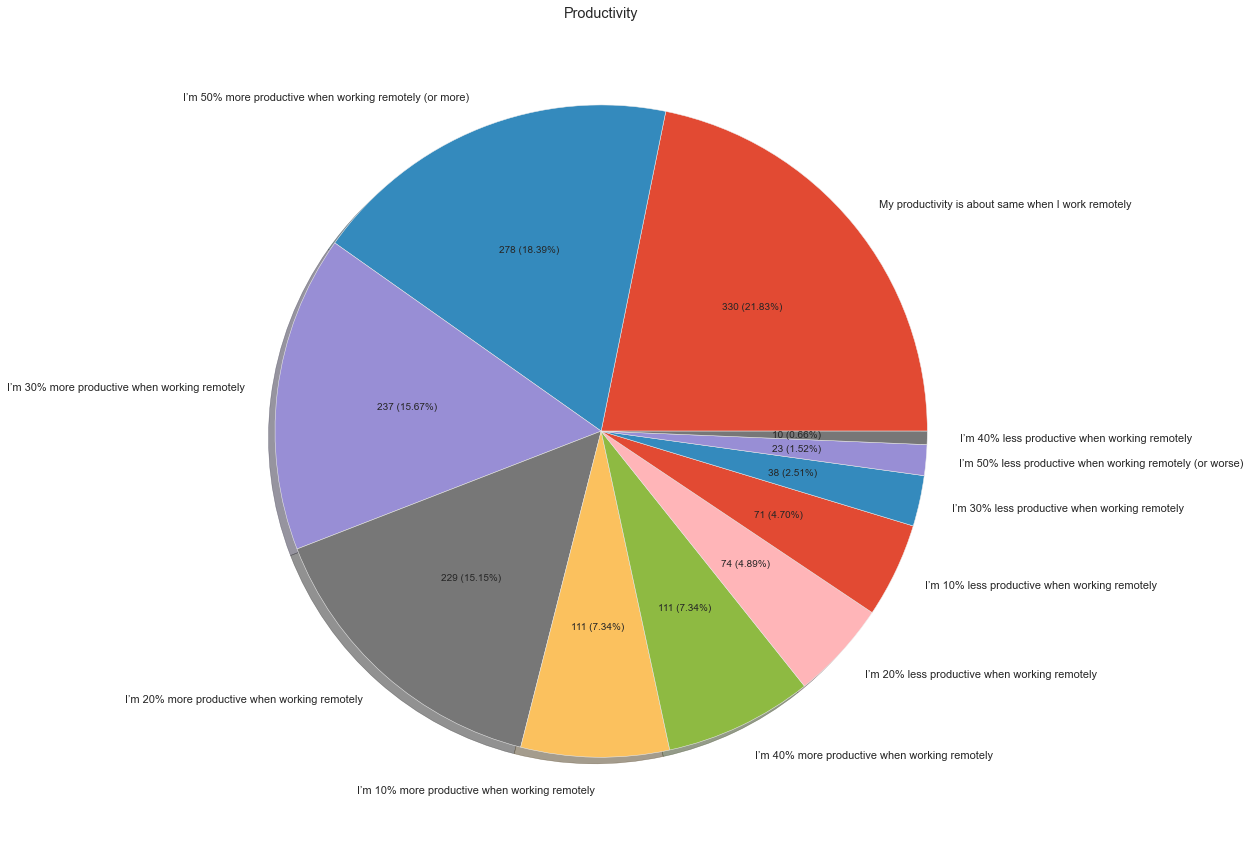

In [47]:
values = prod21_df["Productivity"].value_counts().values
prod21_df["Productivity"].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = "Productivity",figsize = (15,15))


array([<AxesSubplot:ylabel='Productivity'>], dtype=object)

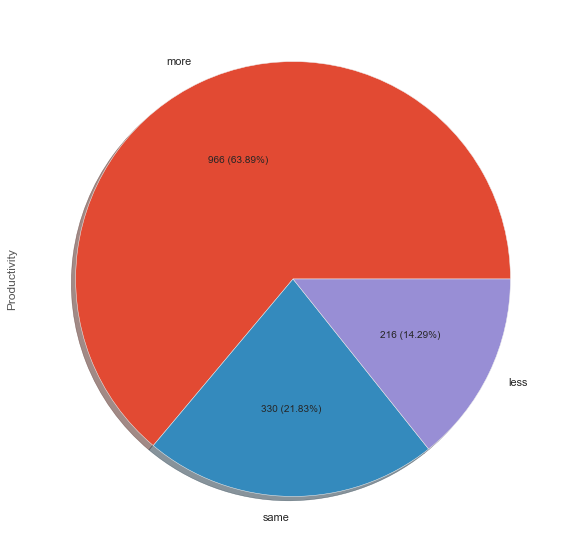

In [48]:
#Summary of responses
hi = prod21_df["Productivity"].value_counts()
new_list = [0,0,0]
for key,value in pd.DataFrame(hi).iterrows():
  if "more" in key:
    new_list[0] += value[0]
  elif "same" in key:
    new_list[1] += value[0]
  else:
    new_list[2] += value[0]

df = pd.DataFrame({"Productivity":new_list}, index = ["more","same","less"])
df.plot.pie(y = "Productivity", subplots=True,figsize=(25, 10),autopct= autopct_format(new_list), shadow = True,legend=False)

In 2021, employees feel much more productive compared to 2020. This could be because they are more used to working at home and have an establish workflow that is efficient and productive for them

In [49]:
prod21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("Now think about the productivity")]

In [50]:
prod21_df.columns = ["Employer_Productivity"]

<AxesSubplot:title={'center':"Employer's take on Productivity"}, ylabel=' '>

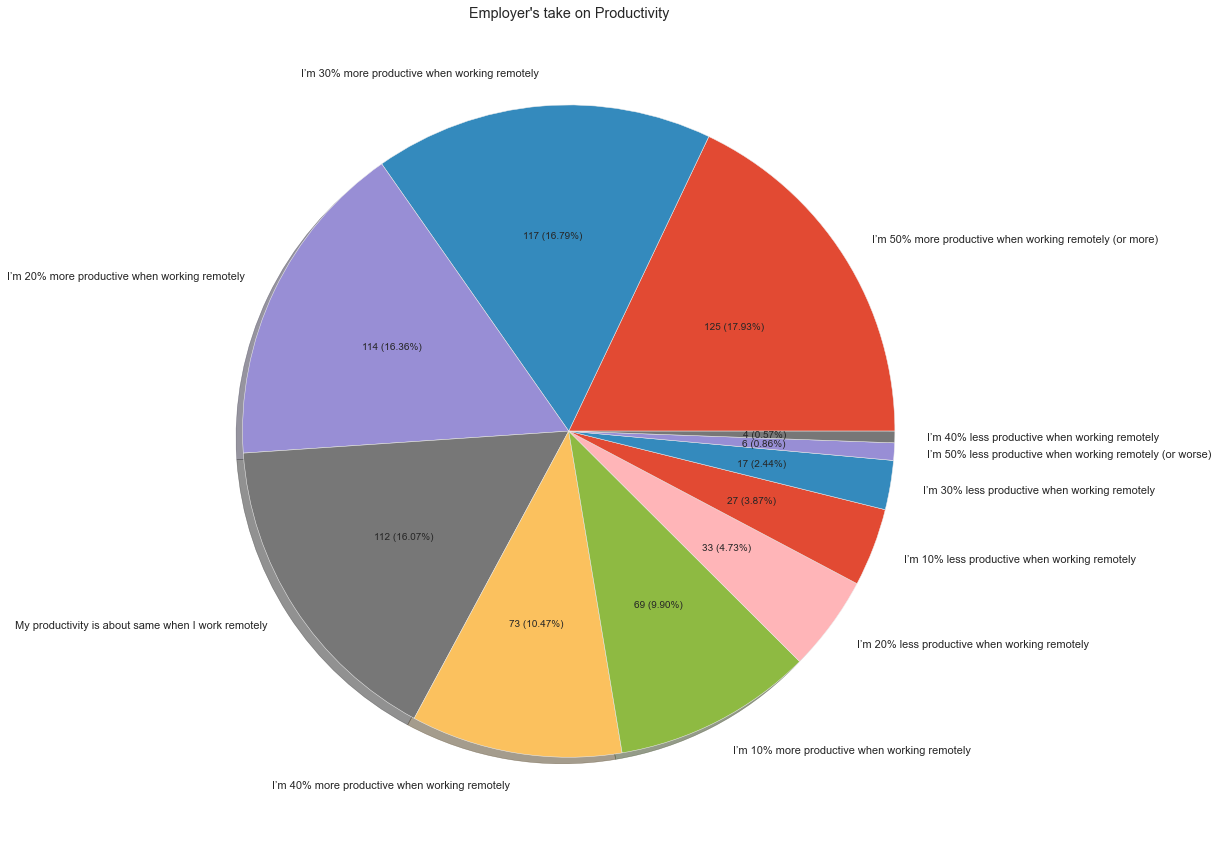

In [51]:
values = prod21_df["Employer_Productivity"].value_counts().values
prod21_df["Employer_Productivity"].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = "Employer's take on Productivity",figsize = (15,15))


array([<AxesSubplot:ylabel='Employer_Productivity'>], dtype=object)

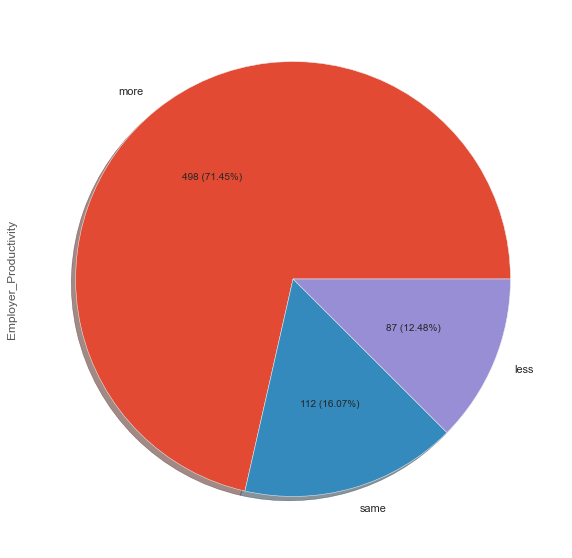

In [52]:
#Summary of responses
hi = prod21_df["Employer_Productivity"].value_counts()
new_list = [0,0,0]
for key,value in pd.DataFrame(hi).iterrows():
  if "more" in key:
    new_list[0] += value[0]
  elif "same" in key:
    new_list[1] += value[0]
  else:
    new_list[2] += value[0]

df = pd.DataFrame({"Employer_Productivity":new_list}, index = ["more","same","less"])
df.plot.pie(y = "Employer_Productivity", subplots=True,figsize=(25, 10),autopct= autopct_format(new_list), shadow = True,legend=False)

Employers/ managers feel that their employers have produced more when they work from home. Around 71% of the them have agreed that productivity has increased with WFH

# What are the biggest barriers to overcome if remote work becomes the norm in the future?


## 2020


In [53]:
#Renaming columns that we want
rename_list = [x for x in range(10)]

barrier20_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("From the following, please select the most significant barrier to doing your work remotely")]
barrier20_df.columns = rename_list #Rename columns

In [54]:
barrier20_df

0  \
0          Difficulty collaborating remotely   
1     IT equipment (computer, printer, etc.)   
2          Difficulty collaborating remotely   
3           Feeling left out and/or isolated   
4                            Poor management   
...                                      ...   
1502      Connectivity (internet connection)   
1503                 Caring responsibilities   
1504        Feeling left out and/or isolated   
1505                         Poor management   
1506                         Poor management   

                                       1  \
0     Connectivity (internet connection)   
1     Connectivity (internet connection)   
2                        Poor management   
3                         Cyber security   
4                        Poor management   
...                                  ...   
1502                  Lack of motivation   
1503    Feeling left out and/or isolated   
1504                  Lack of motivation   
1505                     Poor management   
1506                  Lack of motivation   

                                                      2  \
0              I have tasks that can't be done remotely   
1              I have tasks that can't be done remotely   
2                                       Poor management   
3     My workspace (e.g. suitable chair, lighting, n...   
4                                       Poor management   
...                                                 ...   
1502                                    Poor management   
1503                   Feeling left out and/or isolated   
1504             My organisation's software and systems   
1505             My organisation's software and systems   
1506                                    Poor management   

                                                      3  \
0                    Connectivity (internet connection)   
1                    Connectivity (internet connection)   
2                                       Poor management   
3                      Feeling left out and/or isolated   
4                                       Poor management   
...                                                 ...   
1502              Management discourages remote working   
1503                 Connectivity (internet connection)   
1504  My living situation (e.g. location, home size,...   
1505              Management discourages remote working   
1506              Management discourages remote working   

                                           4  \
0                         Lack of motivation   
1     IT equipment (computer, printer, etc.)   
2                    Caring responsibilities   
3                         Lack of motivation   
4                    Caring responsibilities   
...                                      ...   
1502                      Lack of motivation   
1503  IT equipment (computer, printer, etc.)   
1504                      Lack of motivation   
1505  IT equipment (computer, printer, etc.)   
1506                      Lack of motivation   

                                                      5  \
0              I have tasks that can't be done remotely   
1                               Caring responsibilities   
2                My organisation's software and systems   
3     My workspace (e.g. suitable chair, lighting, n...   
4                IT equipment (computer, printer, etc.)   
...                                                 ...   
1502  My workspace (e.g. suitable chair, lighting, n...   
1503                  Difficulty collaborating remotely   
1504  My workspace (e.g. suitable chair, lighting, n...   
1505             IT equipment (computer, printer, etc.)   
1506             My organisation's software and systems   

                                                      6  \
0                     Difficulty collaborating remotely   
1                IT equipment (computer, printer, etc.)   
2                         Lack of remote working skills 

In [55]:
column_list = list(wfh20_df.loc[:,wfh20_df.columns.str.contains("From the following, please select the most significant barrier to doing your work remotely")].columns)

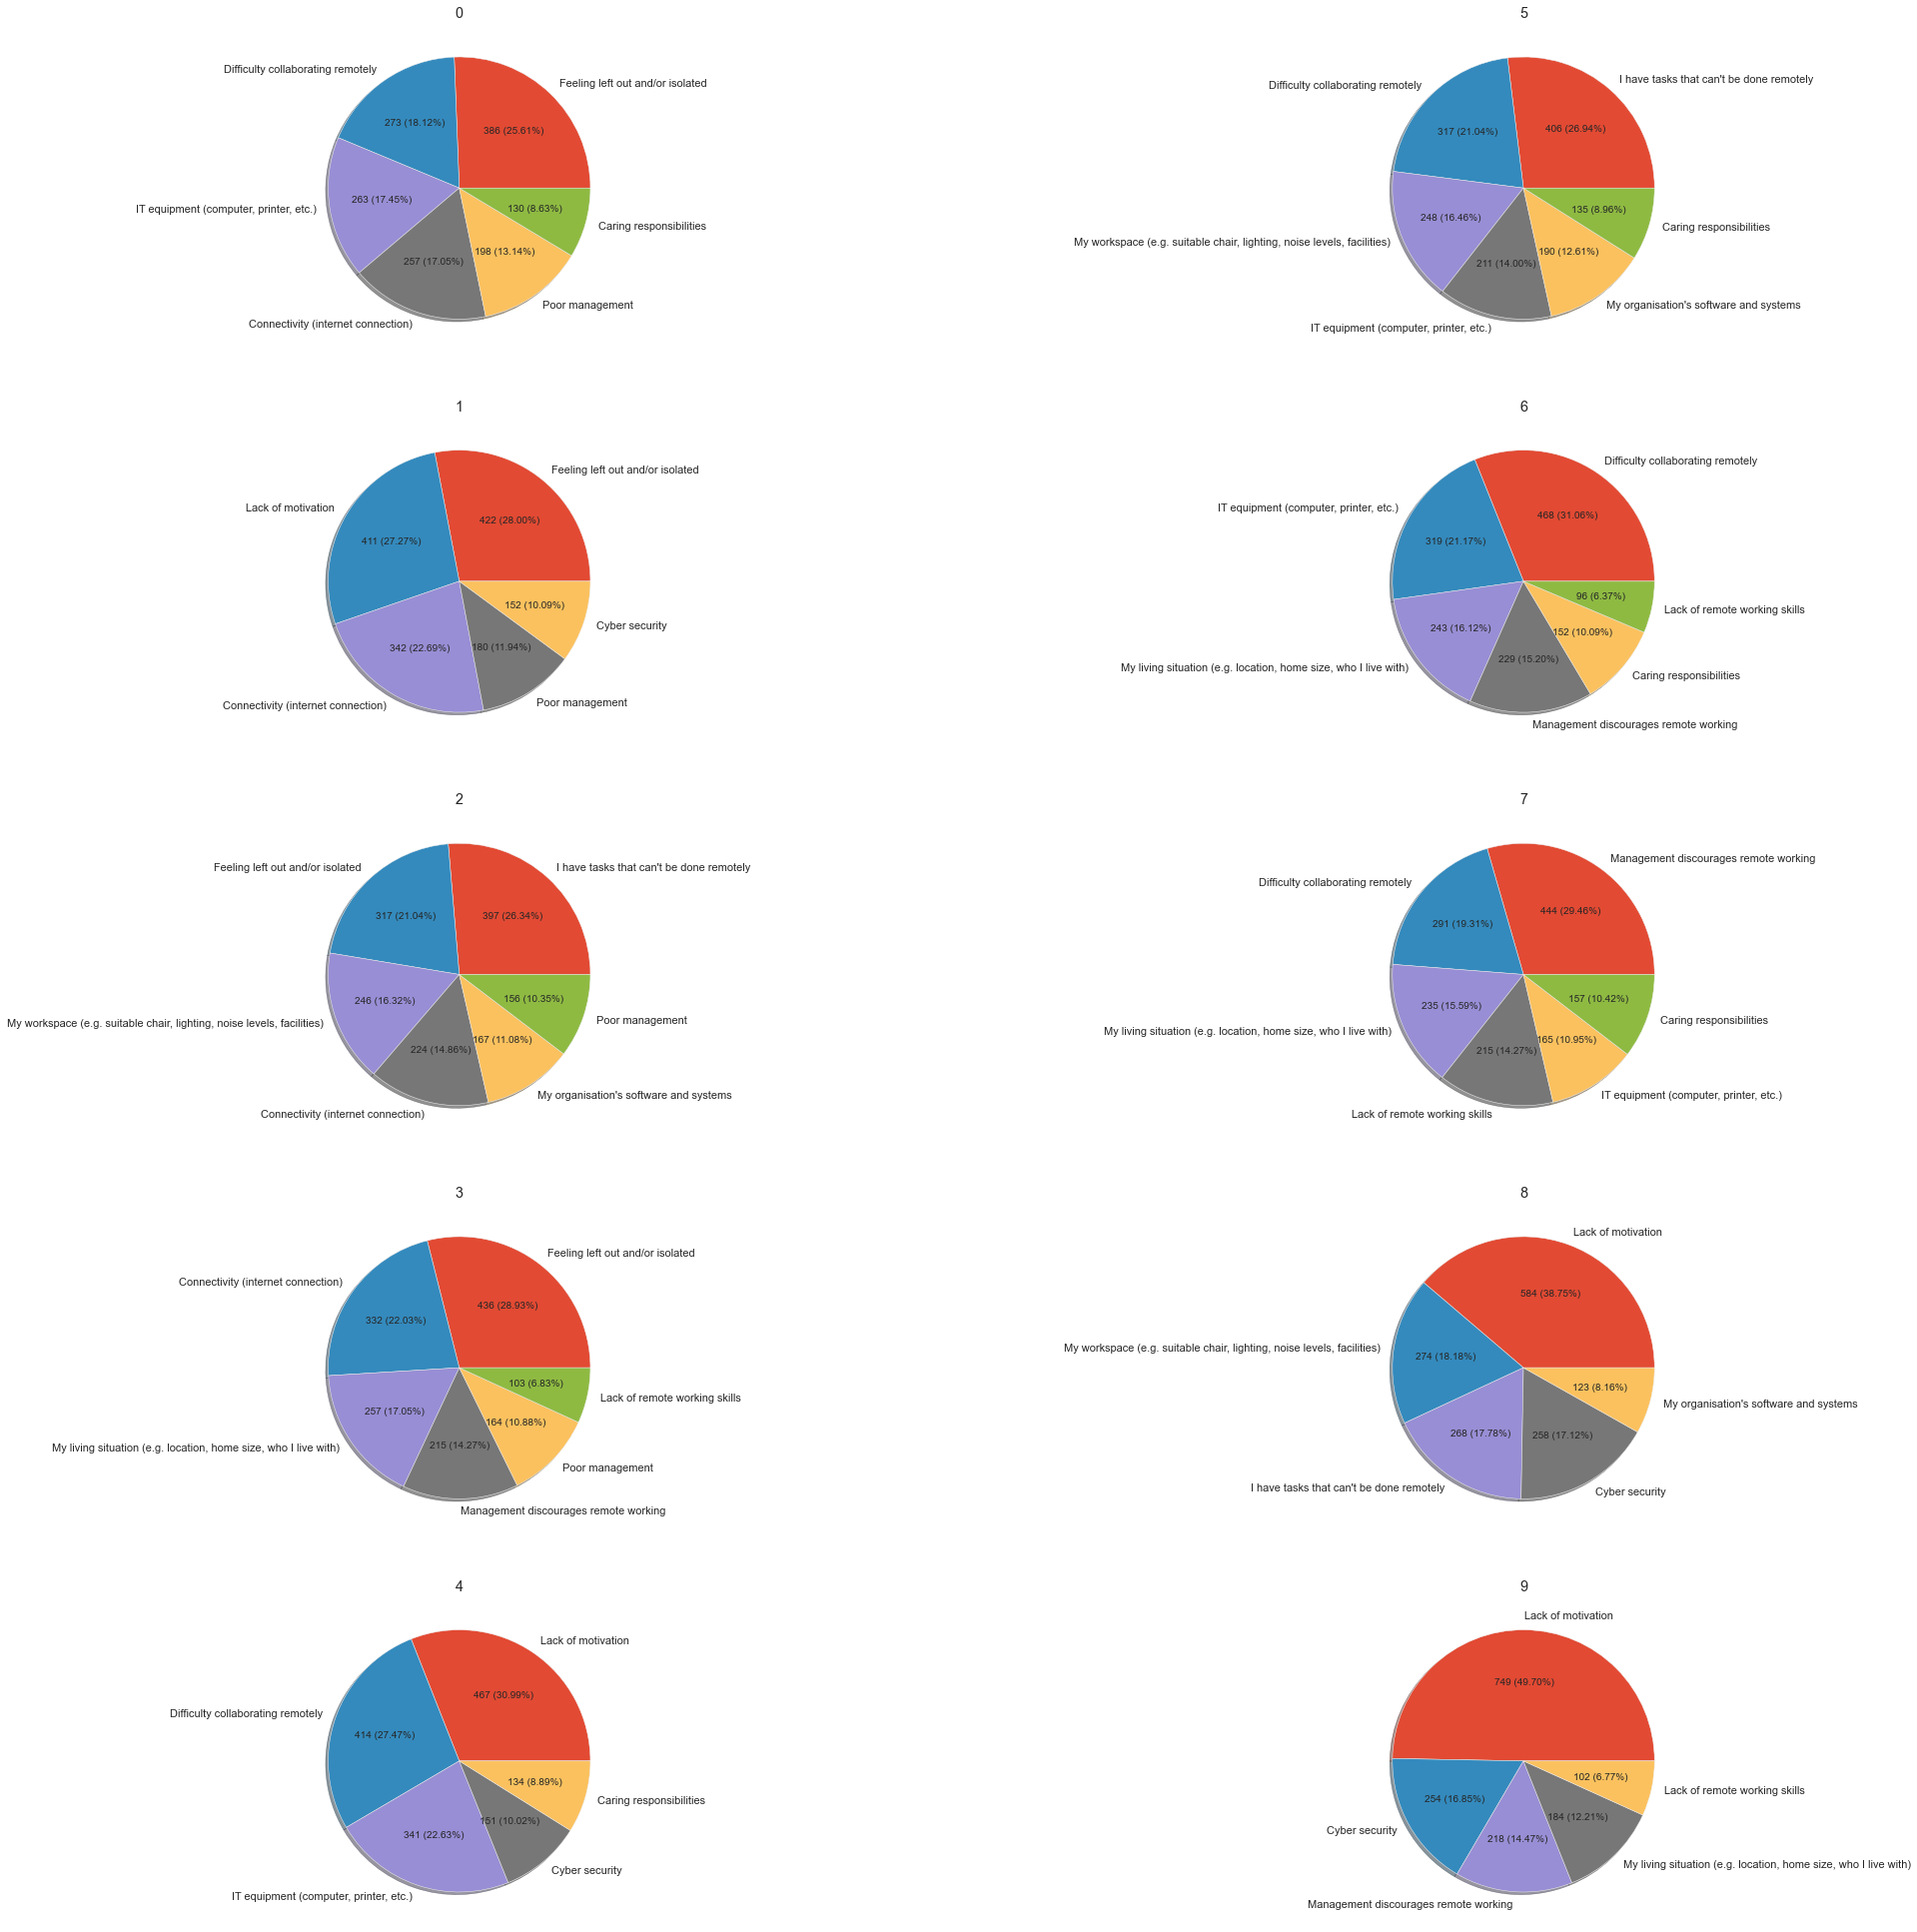

In [56]:
f, axes = plt.subplots(5,2,figsize = (35,35))

row = 0
col=0

count_dict = {}

for i in barrier20_df:
    if row%5==0 and row !=0:
        row = 0
        col +=1

    values = barrier20_df[i].value_counts().values
    indexes = barrier20_df[i].value_counts().index
    
    #This for loop is to generate the count_dict, for each option and the respective count
    for j in range(len(values)):
        if indexes[j] not in count_dict:
            count_dict[indexes[j]] = values[j]
        else:
            count_dict[indexes[j]] += values[j]



    barrier20_df[i].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = str(i), ax = axes[row,col])
    row+=1


In [57]:
values = pd.DataFrame.from_dict(count_dict,orient = "index").sort_values(by = 0, ascending = False)[0].values

<AxesSubplot:title={'center':'Total Aggregation of Barriers to WFH'}, ylabel=' '>

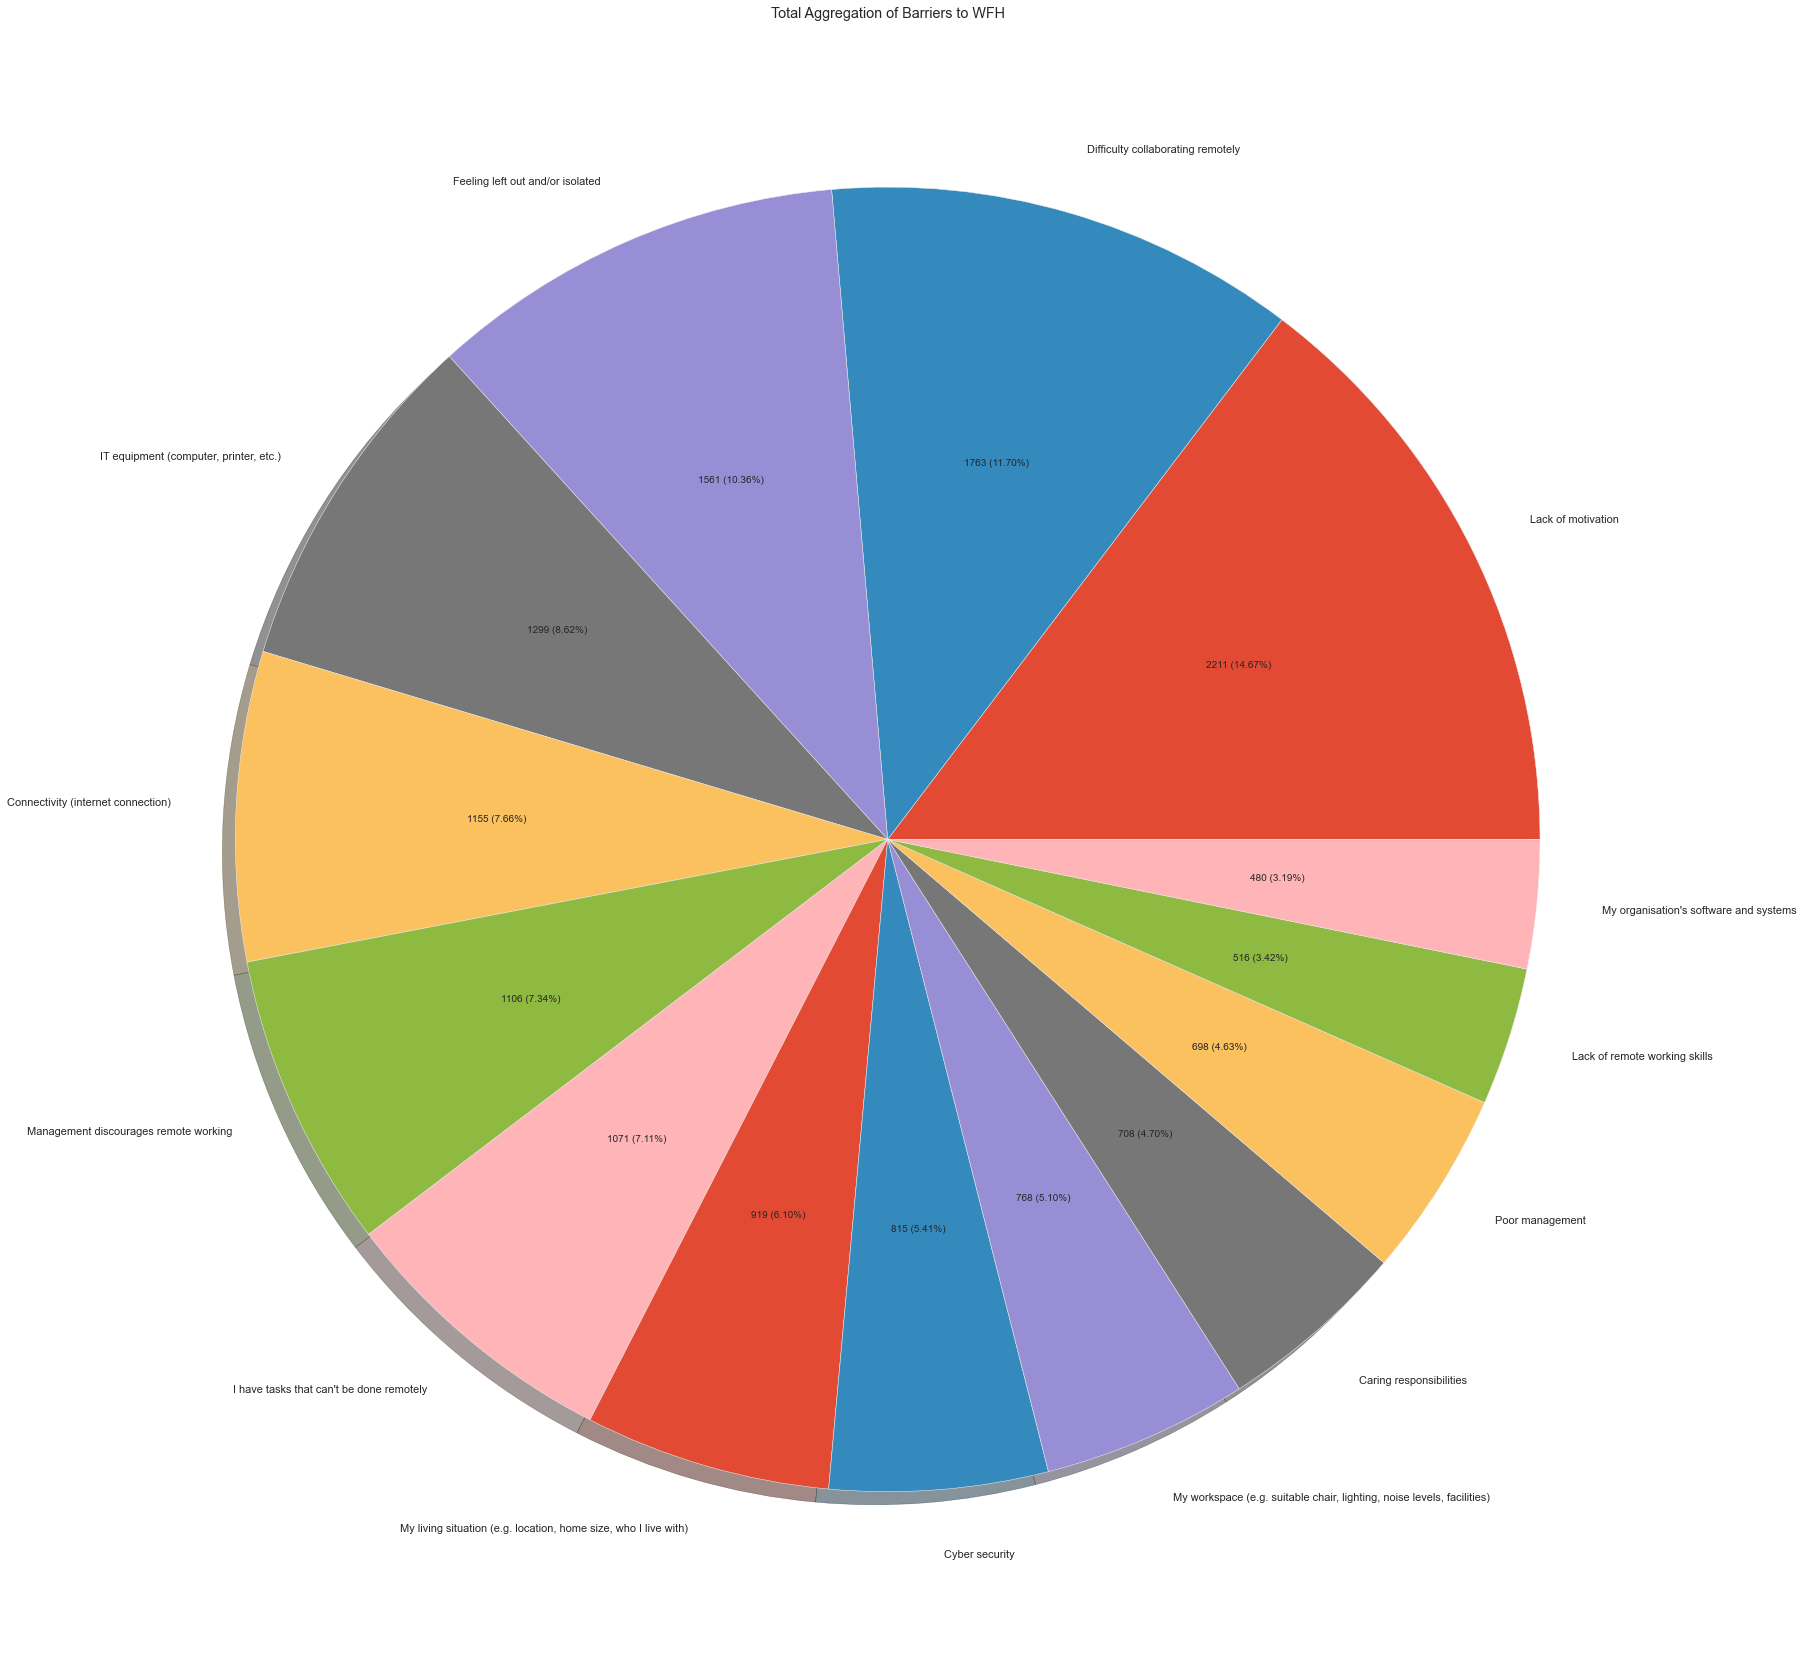

In [58]:
pd.DataFrame.from_dict(count_dict,orient = "index").sort_values(by = 0, ascending = False).plot.pie(y=0,legend = False,autopct= autopct_format(values), shadow = True, figsize = (30,30), ylabel = " ", title = "Total Aggregation of Barriers to WFH")

Lack of motivation is the number 1 reason, followed by difficulty collaborating remotely and then feeling left out.

In [59]:
#Renaming columns that we want

badwfh20_df = wfh20_df.loc[:,wfh20_df.columns.str.contains("Select the worst aspect of remote working for you")]
rename_list = [x for x in range(6)]
badwfh20_df.columns = rename_list #Rename columns

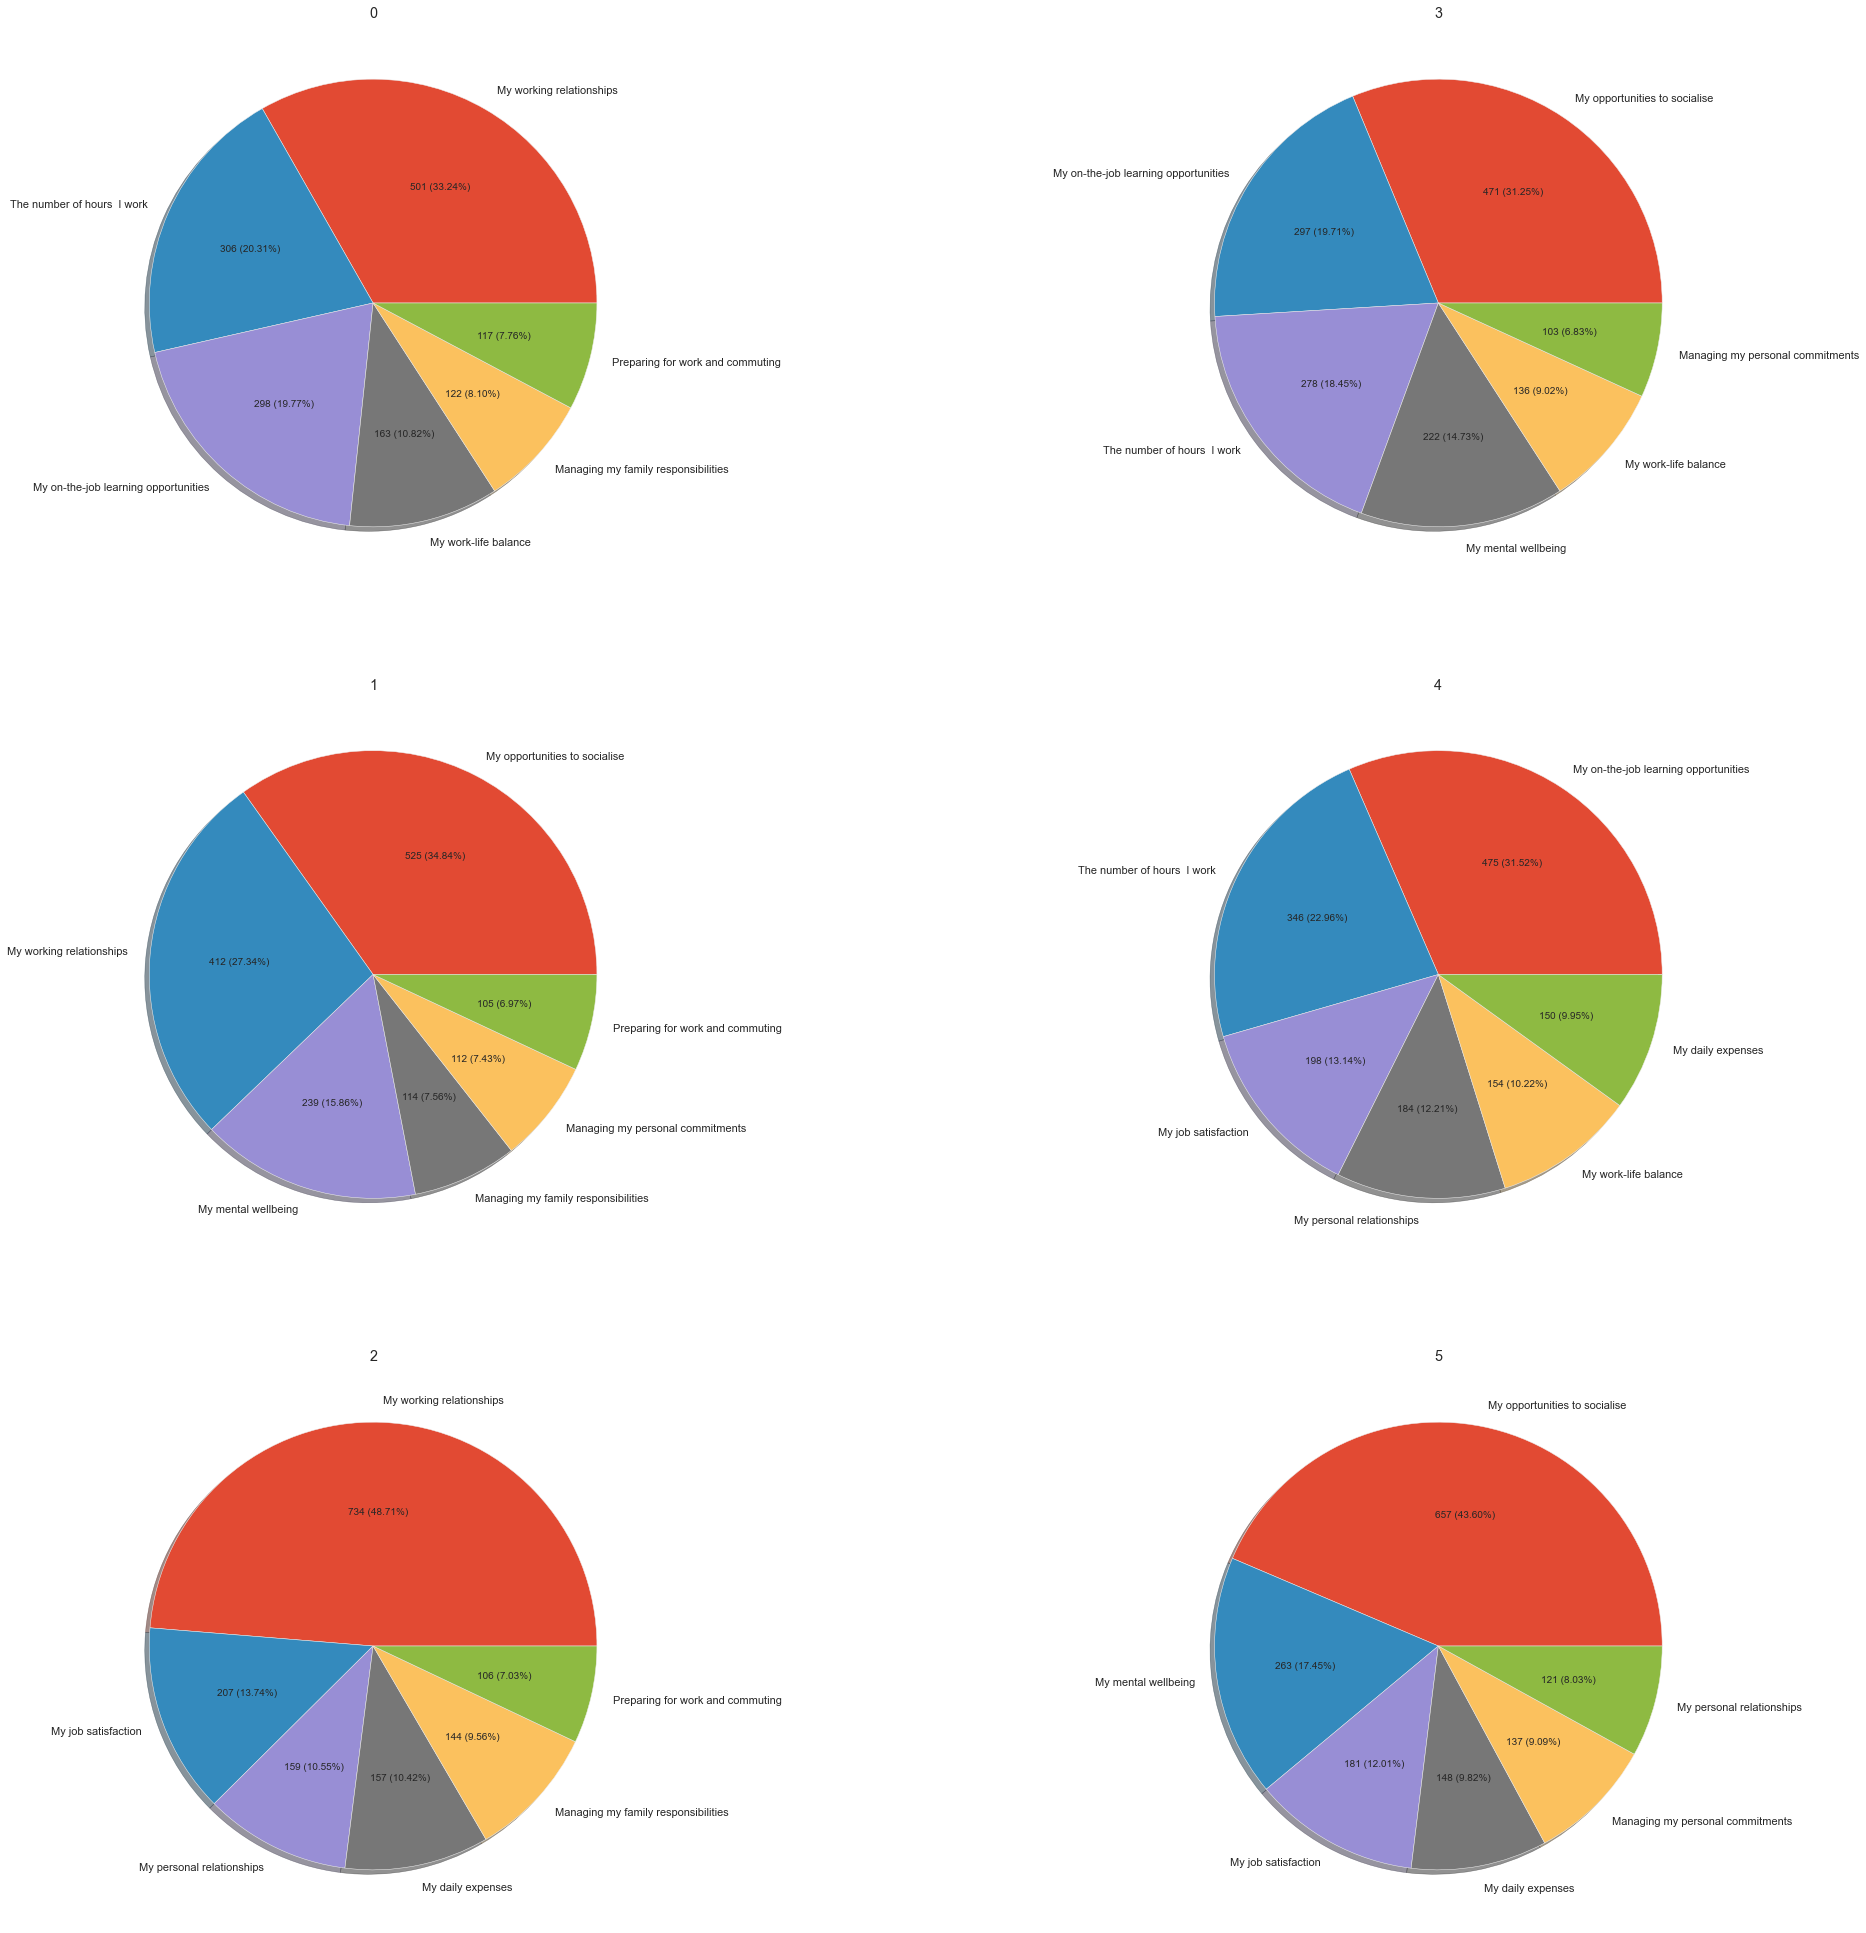

In [60]:
f, axes = plt.subplots(3,2,figsize = (35,35))

row = 0
col=0

count_dict = {}

for i in badwfh20_df:
    if row%3==0 and row !=0:
        row = 0
        col +=1

    values = badwfh20_df[i].value_counts().values
    indexes = badwfh20_df[i].value_counts().index
    
    #This for loop is to generate the count_dict, for each option and the respective count
    for j in range(len(values)):
        if indexes[j] not in count_dict:
            count_dict[indexes[j]] = values[j]
        else:
            count_dict[indexes[j]] += values[j]



    badwfh20_df[i].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = str(i), ax = axes[row,col])
    row+=1

In [61]:
values = pd.DataFrame.from_dict(count_dict,orient = "index").sort_values(by = 0, ascending = False)[0].values

<AxesSubplot:title={'center':'Total Aggregation of Barriers to WFH'}, ylabel=' '>

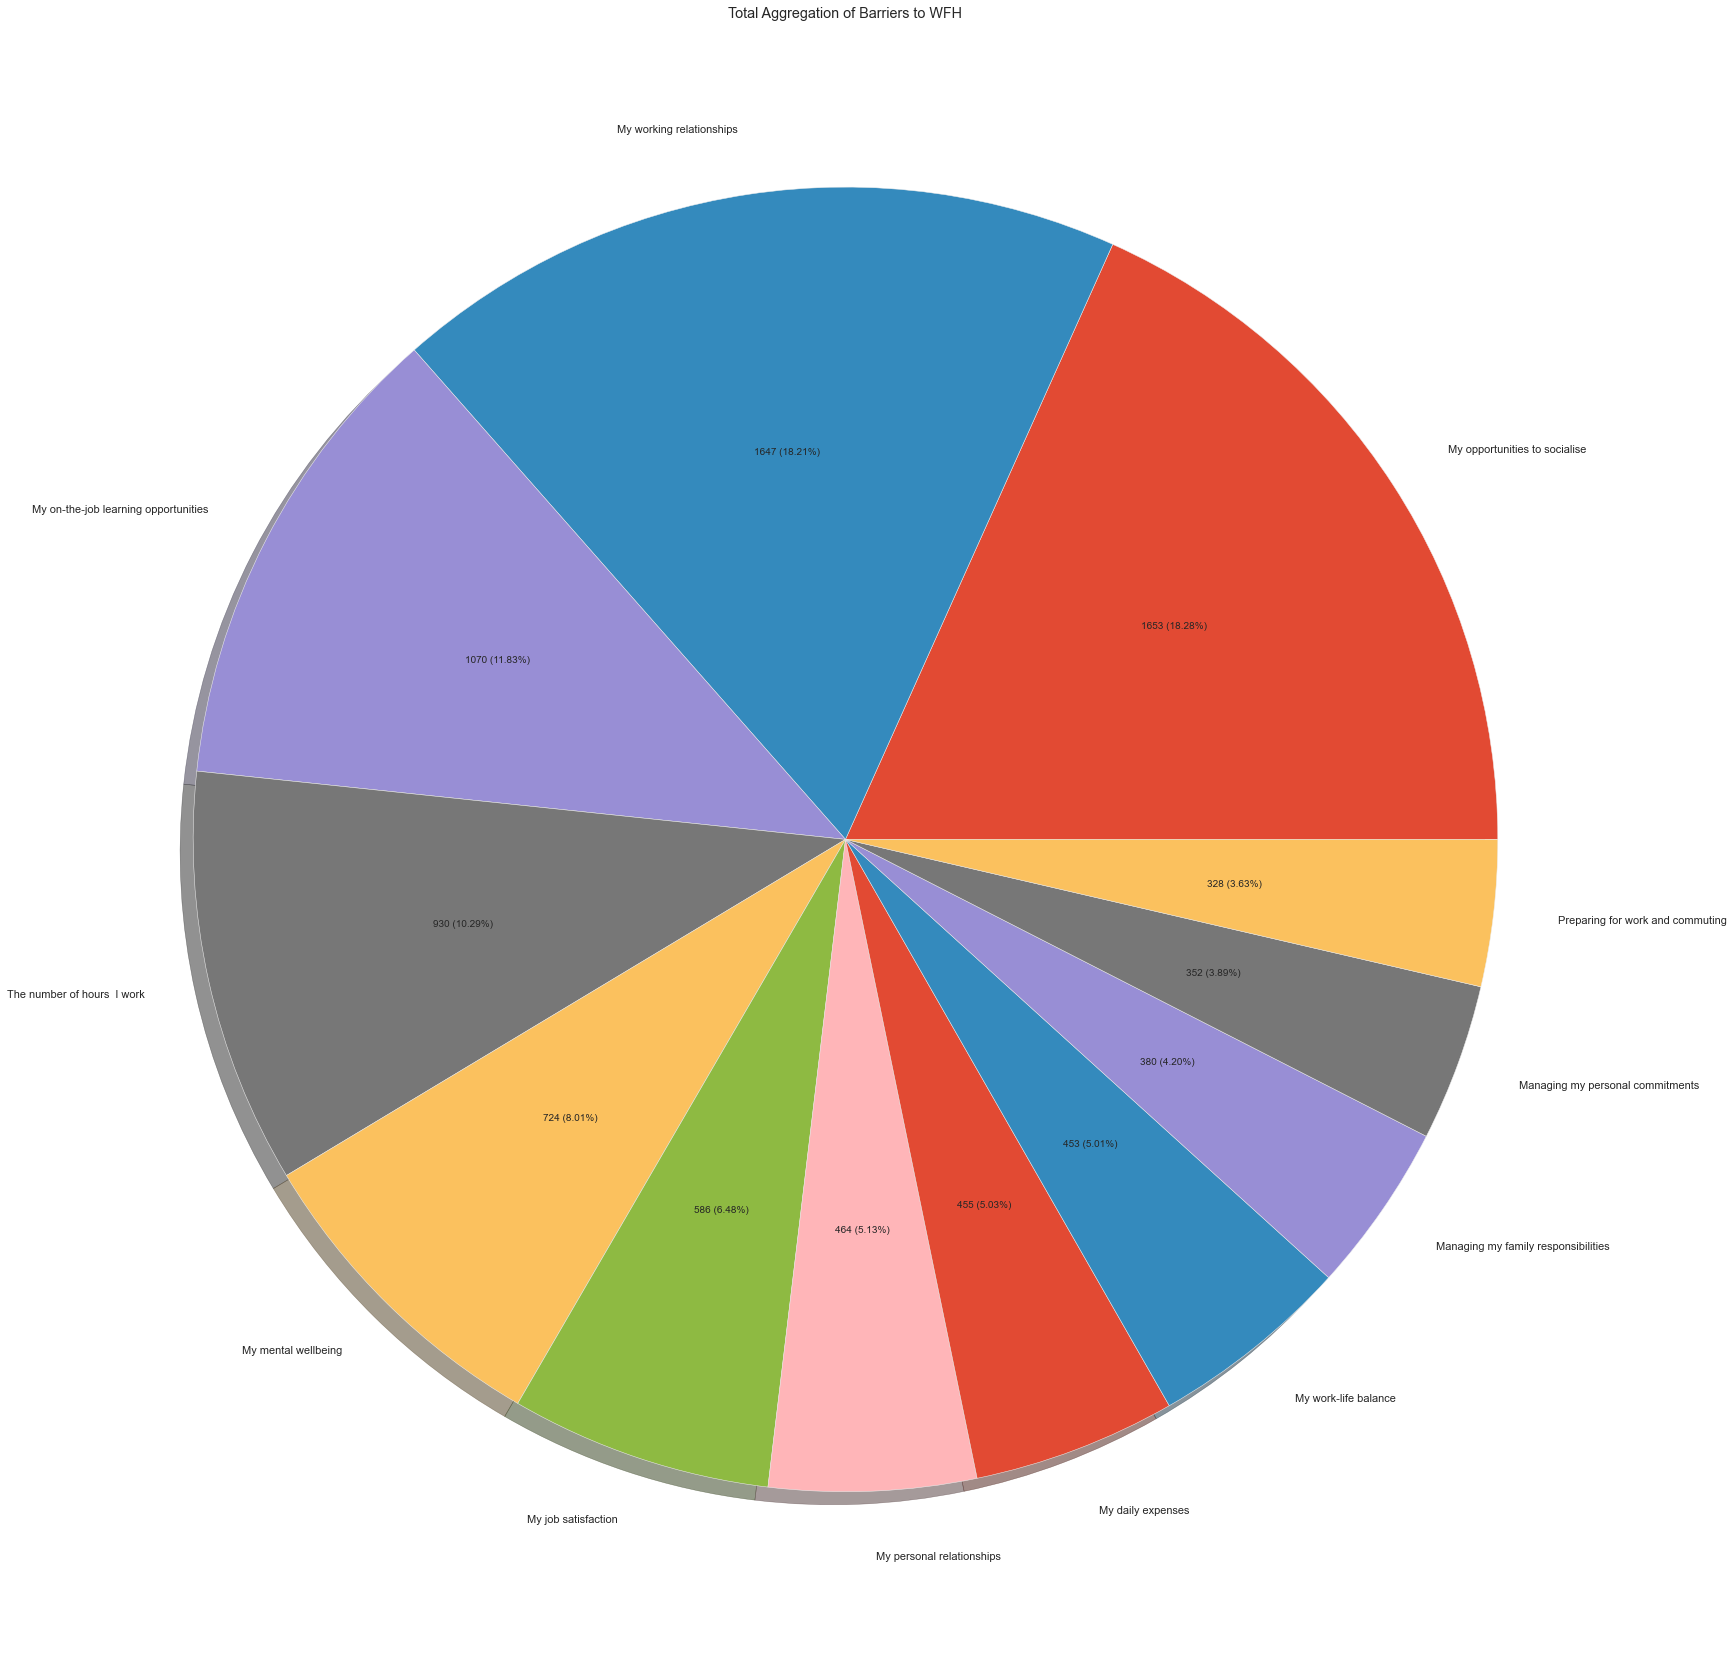

In [62]:
pd.DataFrame.from_dict(count_dict,orient = "index").sort_values(by = 0, ascending = False).plot.pie(y=0,legend = False,autopct= autopct_format(values), shadow = True, figsize = (30,30), ylabel = " ", title = "Total Aggregation of Barriers to WFH")

Majority of WFH concerns lies with "My opportunity to socialize", "My working relationships", "My on-the-job learning opportunities"

## 2021

In [63]:
#Renaming columns that we want
#rename_list = [x for x in range(10)]

barrier21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("Have the following barriers to remote working improved or worsened for you over the past 6 months?")]
new_colnames = []

for i in barrier21_df:
    new_colnames.append(i.split("-")[-1].lstrip())


barrier21_df.columns = new_colnames #Rename columns

In [64]:
barrier21_df

My caring responsibilities Connectivity (for example internet)  \
0             Somewhat improved                   Somewhat improved   
1             Somewhat improved                   Somewhat improved   
2         Stayed about the same               Stayed about the same   
3             Somewhat improved                   Somewhat improved   
4         Stayed about the same               Stayed about the same   
...                         ...                                 ...   
1507      Stayed about the same                   Somewhat improved   
1508      Stayed about the same               Stayed about the same   
1509      Stayed about the same               Stayed about the same   
1510      Stayed about the same               Stayed about the same   
1511      Stayed about the same               Stayed about the same   

     My organisation's software and systems Difficulty collaborating remotely  \
0                     Stayed about the same                 Somewhat improved   
1                         Somewhat improved                 Somewhat improved   
2                     Stayed about the same             Stayed about the same   
3                         Somewhat improved             Stayed about the same   
4                     Stayed about the same             Stayed about the same   
...                                     ...                               ...   
1507                      Somewhat improved             Stayed about the same   
1508                  Stayed about the same                 Somewhat worsened   
1509                  Stayed about the same             Stayed about the same   
1510                  Stayed about the same             Stayed about the same   
1511                  Stayed about the same             Stayed about the same   

            Poor management IT equipment (computer or printer)  \
0         Somewhat improved                  Somewhat improved   
1         Somewhat improved                  Somewhat improved   
2     Stayed about the same              Stayed about the same   
3     Stayed about the same              Stayed about the same   
4     Stayed about the same                  Somewhat worsened   
...                     ...                                ...   
1507  Stayed about the same                  Somewhat improved   
1508      Somewhat worsened              Stayed about the same   
1509  Stayed about the same              Stayed about the same   
1510  Stayed about the same              Stayed about the same   
1511  Stayed about the same              Stayed about the same   

     Feeling left out and/or isolated             Extra costs  \
0                   Somewhat improved       Somewhat improved   
1                   Somewhat improved       Somewhat improved   
2               Stayed about the same   Stayed about the same   
3              Significantly worsened  Significantly worsened   
4               Stayed about the same   Stayed about the same   
...                               ...                     ...   
1507                Somewhat improved       Somewhat improved   
1508            Stayed about the same       Somewhat improved   
1509            Stayed about the same   Stayed about the same   
1510            Stayed about the same   Stayed about the same   
1511            Stayed about the same   Stayed about the same   

             Cyber security I have tasks that can't be done remotely  \
0     Stayed about the same                        Somewhat improved   
1     Stayed about the same                    Stayed about the same   
2     Stayed about the same                     Not a barrier for me   
3      Not a barrier for me                   Significantly worsened   
4     Stayed about the same                    Stayed about the same   
...                     ...                                      ...   
1507      Somewhat improved                    Stayed about the same   
1508  Stayed about the same  

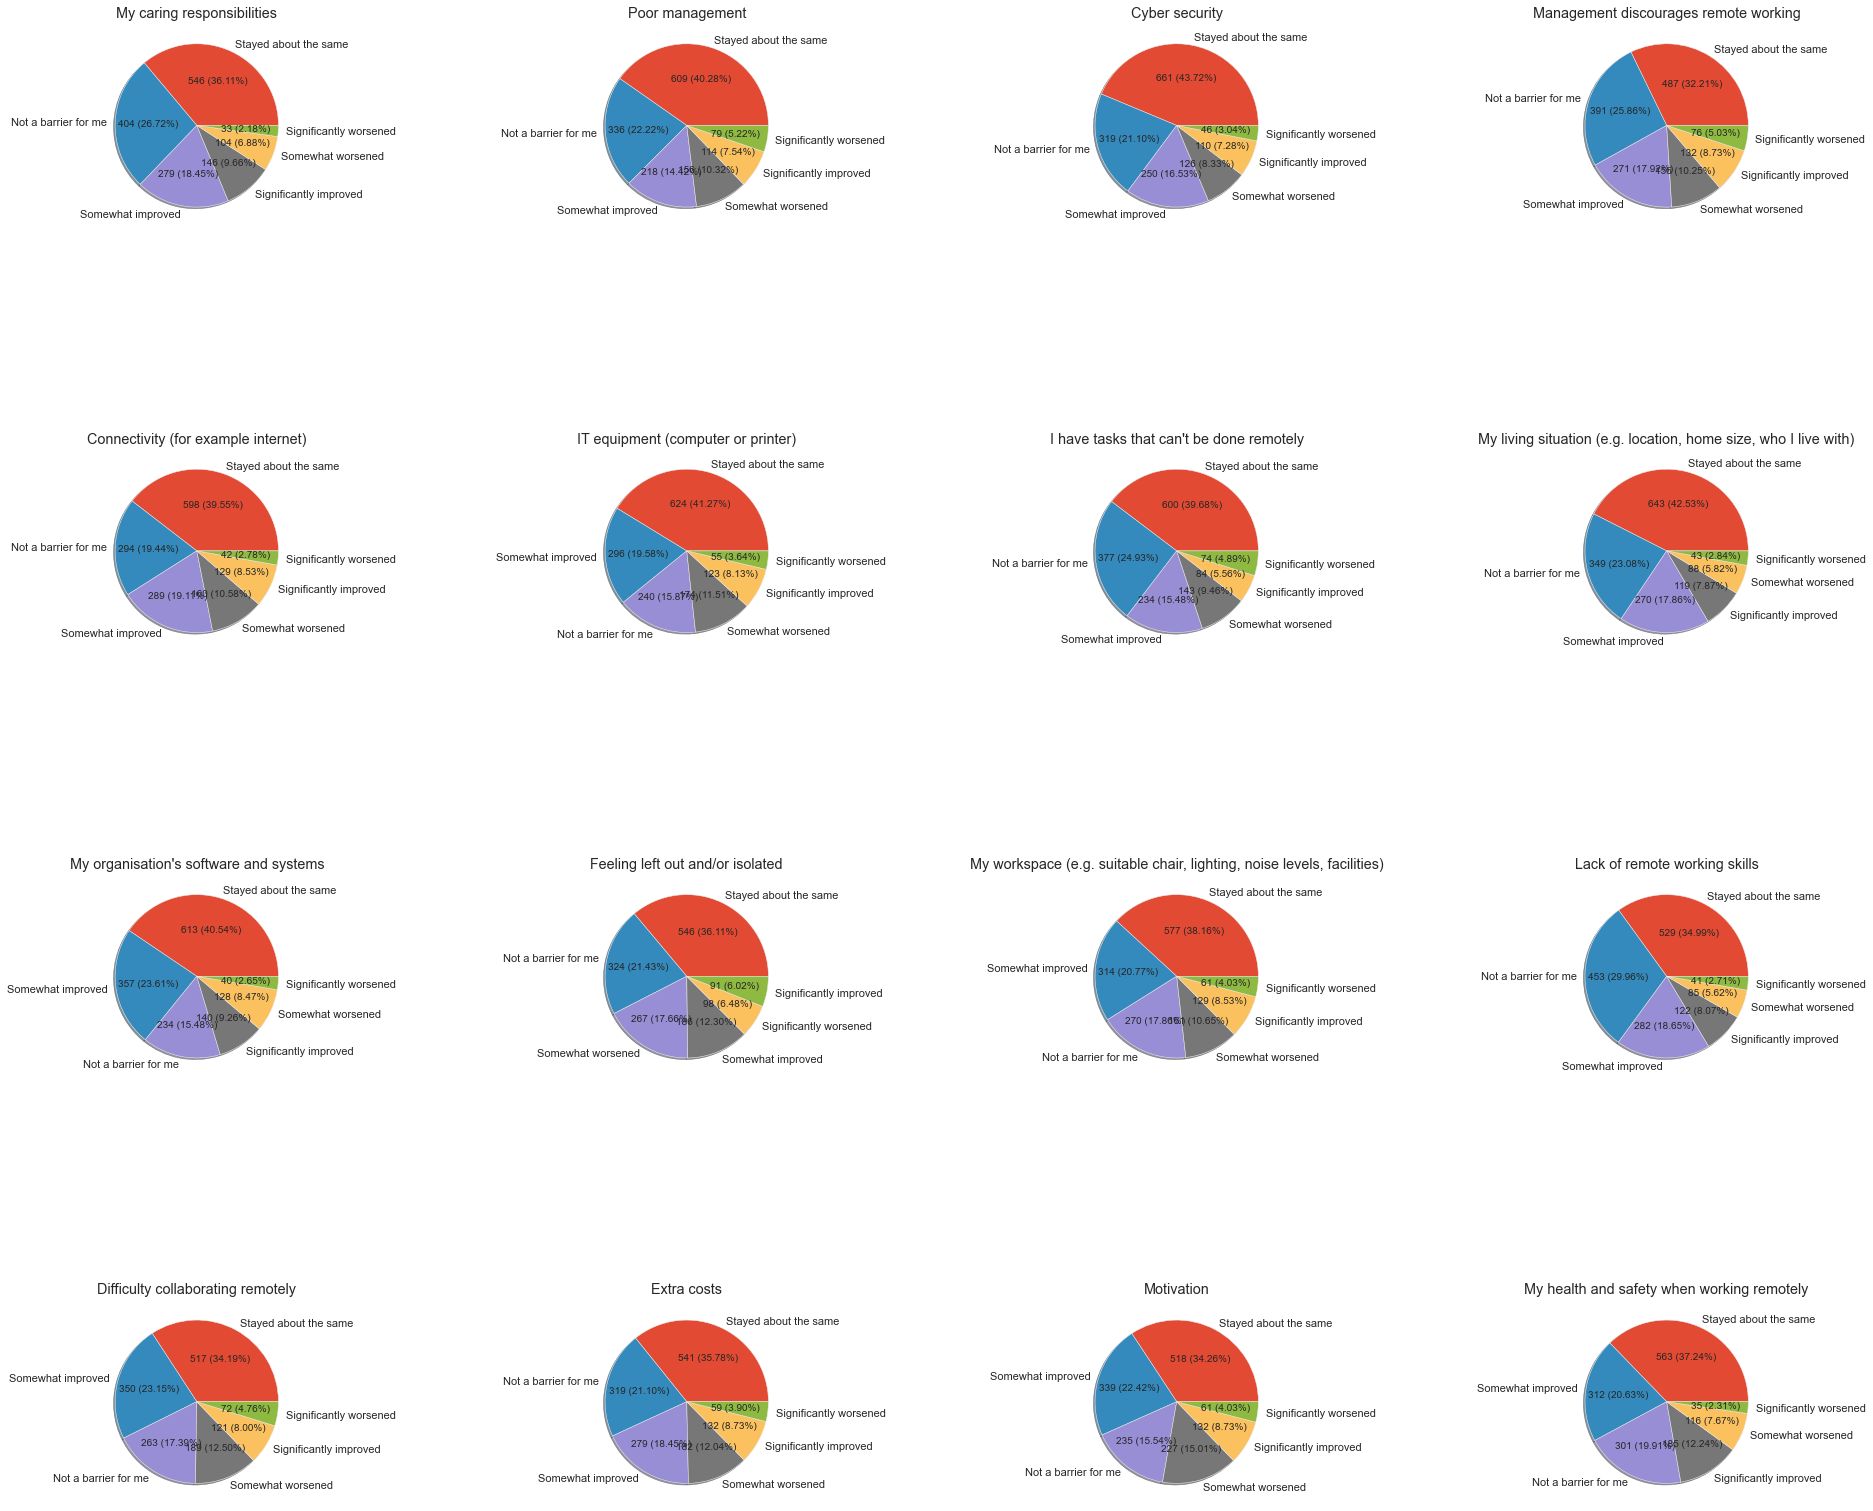

In [65]:

def autopct_format(values): #have to define autopct function
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return str(val) + ' ({:.2%})'.format(val/total)  #'{v}'.format(v=val)
    return my_format


dict_counts = {}

f, axes = plt.subplots(4,4, figsize = (30,30))
row = 0
col = 0
for i in barrier21_df:
    if row%4 ==0 and row!=0:
        row = 0
        col +=1

    values = barrier21_df[i].value_counts().values
    indexes = barrier21_df[i].value_counts().index

    for j in range(len(values)):
        if indexes[j] not in dict_counts:
            dict_counts[indexes[j]] = values[j]
        else:
            dict_counts[indexes[j]] += values[j]


    barrier21_df[i].value_counts().plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = i, ax= axes[row,col])
    row +=1

plt.subplots_adjust(wspace = 1.4)
    

In [66]:
values = pd.DataFrame.from_dict(dict_counts, orient = "index")[0].values

<AxesSubplot:title={'center':'Summation of Selections'}, ylabel=' '>

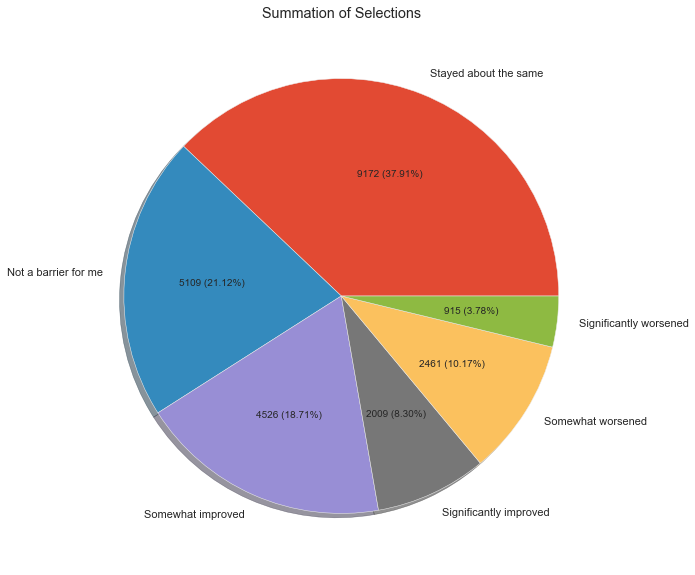

In [67]:
pd.DataFrame.from_dict(dict_counts, orient = "index")[0].plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = "Summation of Selections", figsize = (10,10))

Looking at responses on a whole, the majority felt that their barriers to working from home stayed the same, while secondly people felt that the options presented weren't barriers to them, and thirdly employees felt that their barriers somehwat improved.

In [68]:
barrier21_df = wfh21_df.loc[:,wfh21_df.columns.str.contains("What were the biggest barriers of working this way?")]
new_name = [x for x in range(14)]
#for i in barrier21_df:
#    new_name.append(i.split("-")[-1].lstrip())
barrier21_df.columns = new_name

In [69]:
dict_counts = {}


for i in barrier21_df:
    values = barrier21_df[i].value_counts().values
    indexes = barrier21_df[i].value_counts().index
    for j in range(len(values)):
        if indexes[j] not in dict_counts:
            dict_counts[indexes[j]] = values[j]
        else:
            dict_counts[indexes[j]] += values[j]




In [70]:
pd.DataFrame.from_dict(dict_counts, orient = "index").sort_values(by = 0)

0
Lack of privacy                                   935
Difficulty innovating                            1294
Lack of appropriate work and meeting spaces      1387
Problems with audio-visual setup                 1508
Connectivity/internet issues                     1609
Noisy work environment                           1662
Interruptions                                    2036
Difficulty collaborating with remote colleagues  2113

In [71]:
values = pd.DataFrame.from_dict(dict_counts, orient = "index")
values = values.sort_values(by=0, ascending = False)[0].values

<AxesSubplot:title={'center':'Summation of Selections'}, ylabel=' '>

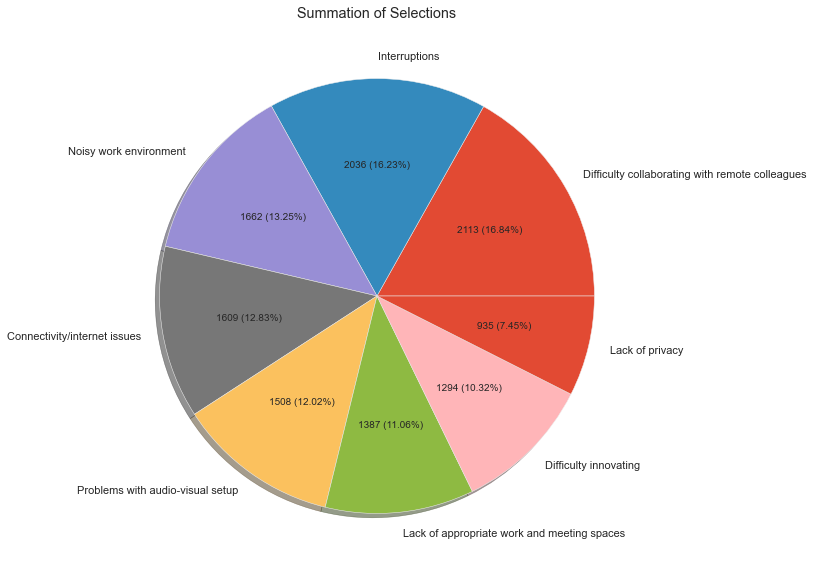

In [72]:
pd.DataFrame.from_dict(dict_counts, orient = "index").sort_values(by = 0, ascending = False)[0].plot.pie(autopct= autopct_format(values), shadow = True,legend=False, ylabel = " ", title = "Summation of Selections", figsize = (10,10))
#plt.savefig('HybridWFH.png')

Problems of Hybrid working arrangements is mainly due to "Difficulty collaborating with remote colleagues", "Interruptions" and "Noisy work environment"